In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
import tweepy

In [ ]:
# Load the dataset correctly
df = pd.read_csv('/content/drive/MyDrive/disaster_tweet.csv')

#Dataset Exploration

Dataset Overview:
   id keyword        location  \
0   0  ablaze             NaN   
1   1  ablaze             NaN   
2   2  ablaze   New York City   
3   3  ablaze  Morgantown, WV   
4   4  ablaze             NaN   

                                                text  target  
0  Communal violence in Bhainsa, Telangana. "Ston...       1  
1  Telangana: Section 144 has been imposed in Bha...       1  
2  Arsonist sets cars ablaze at dealership https:...       1  
3  Arsonist sets cars ablaze at dealership https:...       1  
4  "Lord Jesus, your love brings freedom and pard...       0  


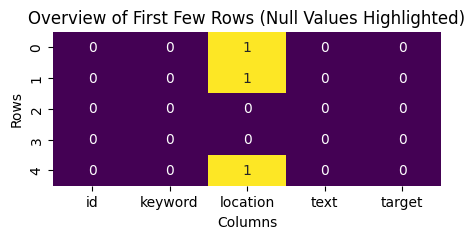

In [ ]:
print("Dataset Overview:")
# Displaying the first rows of dataset
print(df.head())
# Visualize the first few rows of the dataset using a table plot
plt.figure(figsize=(5, 2))
sns.heatmap(df.head().isnull(), cbar=False, cmap='viridis', annot=True)
plt.title('Overview of First Few Rows (Null Values Highlighted)')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


 Data Preprocessing & Applying preprocessing to tweet text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


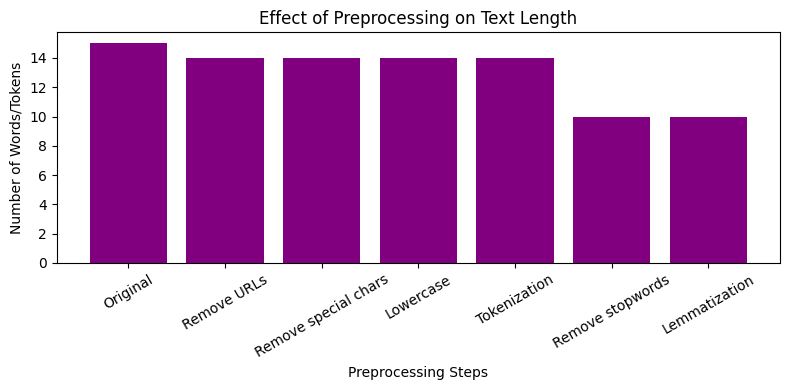

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing steps
def preprocess_text(text):
    steps = []

    # Original length
    steps.append(('Original', len(text.split())))

    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    steps.append(('Remove URLs', len(text.split())))

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    steps.append(('Remove special chars', len(text.split())))

    # Convert to lowercase
    text = text.lower()
    steps.append(('Lowercase', len(text.split())))

    # Tokenization
    tokens = word_tokenize(text)
    steps.append(('Tokenization', len(tokens)))

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    steps.append(('Remove stopwords', len(tokens)))

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    steps.append(('Lemmatization', len(tokens)))

    # Return the final text and step details
    return ' '.join(tokens), steps
    # Sample text
text = "Natural disasters like floods, earthquakes, and wildfires can cause significant damage. Learn more at http://disasterresponse.com"

# Preprocess text
processed_text, steps = preprocess_text(text)

# Plot the bar graph
labels, counts = zip(*steps)
plt.figure(figsize=(8, 4))
plt.bar(labels, counts, color='Purple')
plt.xlabel('Preprocessing Steps')
plt.ylabel('Number of Words/Tokens')
plt.title('Effect of Preprocessing on Text Length')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


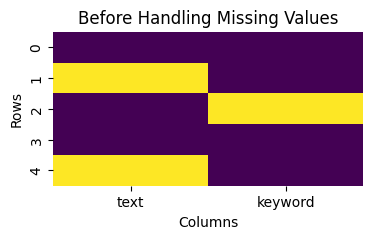

<ipython-input-61-ebf73708bdc9>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['keyword'].fillna('unknown', inplace=True)


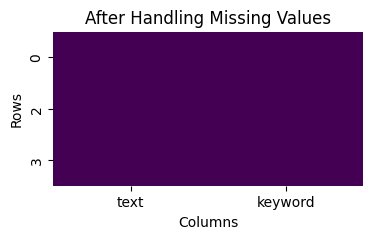

In [ ]:
# Sample DataFrame
data = {
    'text': ['Sample text', np.nan, 'Another text', 'More text', np.nan],
    'keyword': ['keyword1', 'keyword2', np.nan, 'keyword4', 'keyword5']
}
df = pd.DataFrame(data)

# Function to visualize missing values
def visualize_missing(df, title):
    plt.figure(figsize=(4, 2))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title(title)
    plt.xlabel('Columns')
    plt.ylabel('Rows')
    plt.show()

# Visualize before handling missing values
visualize_missing(df, 'Before Handling Missing Values')

# Handle missing values
df.dropna(subset=['text'], inplace=True)
df['keyword'].fillna('unknown', inplace=True)

# Visualize after handling missing values
visualize_missing(df, 'After Handling Missing Values')

Exploratory Data Analysis

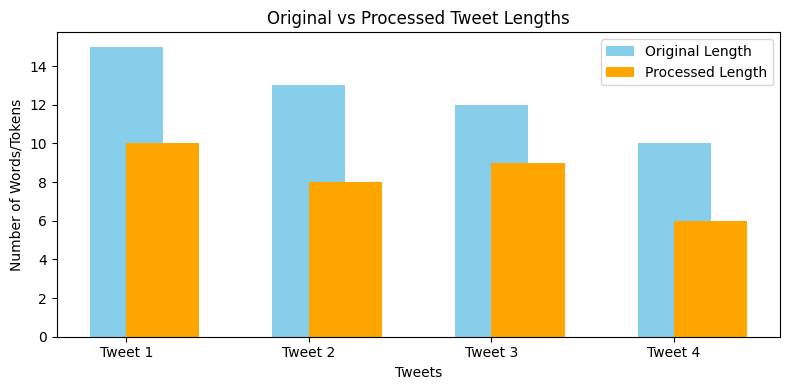

In [ ]:
# Sample DataFrame with tweet text
data = {'text': ["Natural disasters like floods, earthquakes, and wildfires can cause significant damage. Learn more at http://disasterresponse.com",
                 "The earthquake in City A has left thousands homeless and destroyed many homes.",
                 "Floods have devastated the coastal region, leaving residents stranded and without power.",
                 "Wildfires are rapidly spreading in the forest, evacuations are underway!"]}
df = pd.DataFrame(data)

# Lists to store original and processed lengths
original_lengths = []
processed_lengths = []

# Apply preprocessing and store lengths
if 'text' in df.columns:
    for text in df['text']:
        original_lengths.append(len(text.split()))  # Number of words before preprocessing
        processed_text, processed_len = preprocess_text(text)  # Preprocess and get processed length
        processed_lengths.append(processed_len)
        df['processed_text'] = df['text'].apply(lambda x: preprocess_text(x)[0])  # Store processed text
else:
    print("Error: 'text' column not found in the DataFrame.")

# Remove duplicates (using 'text' column)
if 'text' in df.columns:
    df.drop_duplicates(subset=['text'], inplace=True)
else:
    print("Error: 'text' column not found for removing duplicates.")

# Plot the comparison
labels = ['Tweet 1', 'Tweet 2', 'Tweet 3', 'Tweet 4']  # Labels for the tweets
x = range(len(df))  # Number of tweets

plt.figure(figsize=(8, 4))
plt.bar(x, original_lengths, width=0.4, label='Original Length', align='center', color='skyblue')
plt.bar(x, processed_lengths, width=0.4, label='Processed Length', align='edge', color='orange')

plt.xlabel('Tweets')
plt.ylabel('Number of Words/Tokens')
plt.title('Original vs Processed Tweet Lengths')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()


1. Tweet volume over time

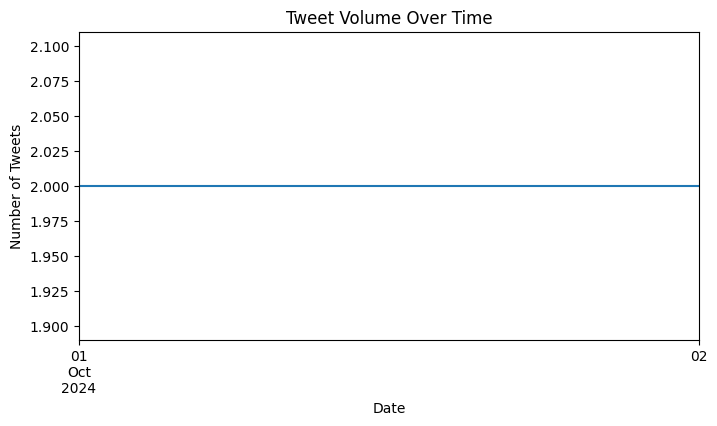

In [ ]:

# Sample DataFrame with a timestamp column (use your actual DataFrame here)
data = {'created_at': ["2024-10-01 12:34:00", "2024-10-01 13:01:00", "2024-10-02 08:21:00", "2024-10-02 09:45:00"]}
df = pd.DataFrame(data)

# Check column name (assuming it's 'created_at' instead of 'timestamp')
df['timestamp'] = pd.to_datetime(df['created_at'])

# Resample and plot tweet counts over time
tweet_counts = df.resample('D', on='timestamp').size()

plt.figure(figsize=(8, 4))
tweet_counts.plot()
plt.title('Tweet Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')

# Save and display the plot
plt.savefig('tweet_volume.png')
plt.show()  # Display the figure


2.User Types

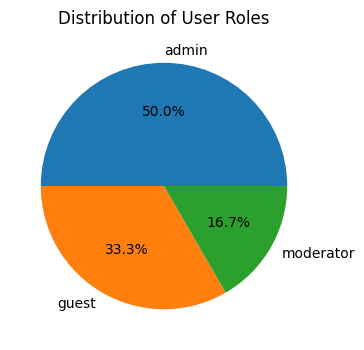

In [ ]:
# Sample DataFrame with a 'user_role' column
data = {'user_role': ['admin', 'guest', 'admin', 'moderator', 'guest', 'admin']}
df = pd.DataFrame(data)

# Calculate value counts for user roles
user_types = df['user_role'].value_counts()

# Plot pie chart of user types
plt.figure(figsize=(4, 4))
plt.pie(user_types.values, labels=user_types.index, autopct='%1.1f%%')
plt.title('Distribution of User Roles')
plt.savefig('user_types.png')
plt.show()


3. Most common hashtags

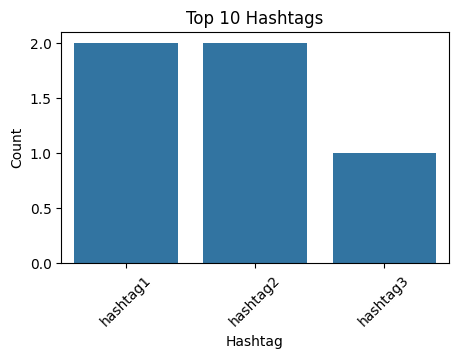

In [ ]:
# Sample DataFrame (use your actual DataFrame here)
data = {'text': [
    "This is a tweet with #hashtag1 and #hashtag2",
    "Another tweet with #hashtag2 and #hashtag3",
    "Tweet without hashtags",
    "Tweet with #hashtag1 only"
]}
df = pd.DataFrame(data)

# Function to extract hashtags
def extract_hashtags(text):
    return re.findall(r'#(\w+)', text)

# Extract all hashtags from the DataFrame
all_hashtags = [hashtag for text in df['text'] for hashtag in extract_hashtags(text)]

# Get the top 10 hashtags
top_hashtags = Counter(all_hashtags).most_common(10)

# Plot the top 10 hashtags
plt.figure(figsize=(5, 3))
sns.barplot(x=[tag for tag, count in top_hashtags], y=[count for tag, count in top_hashtags])
plt.title('Top 10 Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig('top_hashtags.png')
plt.show()


4. Tweet length distribution

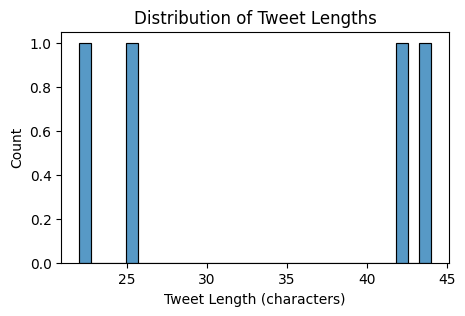

In [ ]:
# Assuming 'text' is the correct column for tweets
df['tweet_length'] = df['text'].str.len()

plt.figure(figsize=(5, 3))
sns.histplot(df['tweet_length'], bins=30)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Count')

# Save and display the plot
plt.savefig('tweet_length_distribution.png')
plt.show()  # Display the figure
plt.close()


5. Word cloud of most common words


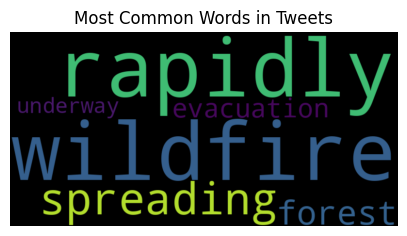

Dataset Summary:


In [ ]:
!pip install wordcloud

df['processed_text'] = processed_text
all_words = ' '.join(df['processed_text']) # Join the values in the 'processed_text' column
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_words)

plt.figure(figsize=(5, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Tweets')
plt.savefig('word_cloud.png')
plt.show()
plt.close()
# Print summary statistics
print("Dataset Summary:")

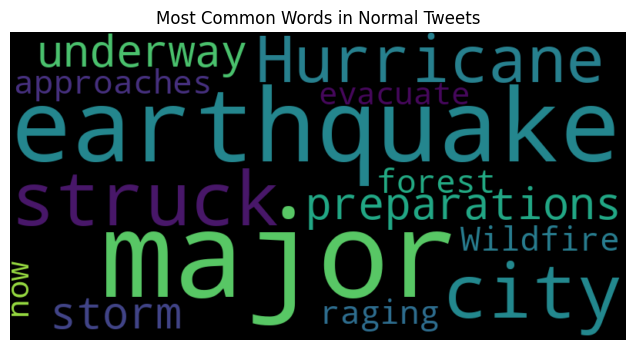

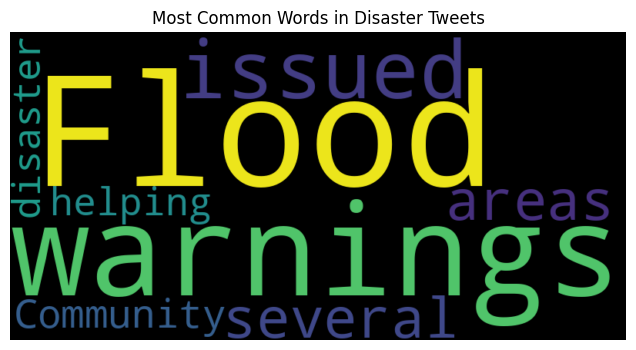

Dataset Summary:
Total Tweets: 5
Normal Tweets: 3
Disaster Tweets: 2


In [ ]:
# Assuming df is your DataFrame and 'processed_text' contains preprocessed tweets
# Sample DataFrame setup (replace this with your actual DataFrame)
data = {
    'processed_text': [ "A major earthquake has struck the city.",
        "Flood warnings have been issued in several areas.",
        "Hurricane preparations are underway as the storm approaches.",
        "Community helping each other after the disaster.",
        "Wildfire raging in the forest, evacuate now!"
   ],
    'is_disaster': [0, 1, 0, 1, 0]  # 0 for normal, 1 for disaster
}
df = pd.DataFrame(data)

# Separate normal and disaster tweets
normal_tweets = df[df['is_disaster'] == 0]
disaster_tweets = df[df['is_disaster'] == 1]

# Function to generate and display word cloud
def generate_wordcloud(data, title):
    all_words = ' '.join(data['processed_text'])  # Join the values in the 'processed_text' column
    wordcloud = WordCloud(width=800, height=400, background_color='Black').generate(all_words)

    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()  # Display the word cloud

# Generate word clouds for both normal and disaster tweets
generate_wordcloud(normal_tweets, 'Most Common Words in Normal Tweets')
generate_wordcloud(disaster_tweets, 'Most Common Words in Disaster Tweets')

# Print summary statistics
print("Dataset Summary:")
print(f"Total Tweets: {len(df)}")
print(f"Normal Tweets: {len(normal_tweets)}")
print(f"Disaster Tweets: {len(disaster_tweets)}")

Filtered non_disaster_tweet

          id  keyword                 location  \
4          4   ablaze                      NaN   
5          5   ablaze                       OC   
8          8   ablaze             Accra, Ghana   
9          9   ablaze                Searching   
11        11   ablaze                      NaN   
...      ...      ...                      ...   
11364  11364  wrecked                      NaN   
11365  11365  wrecked  Blue State in a red sea   
11366  11366  wrecked               arohaonces   
11367  11367  wrecked                       🇵🇭   
11368  11368  wrecked           auroraborealis   

                                                    text  
4      "Lord Jesus, your love brings freedom and pard...  
5      If this child was Chinese, this tweet would ha...  
8      National Security Minister, Kan Dapaah's side ...  
9      This creature who’s soul is no longer clarent ...  
11     Social media went bananas after Chuba Hubbard ...  
...                                          

<ipython-input-56-b035269b9d4c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')


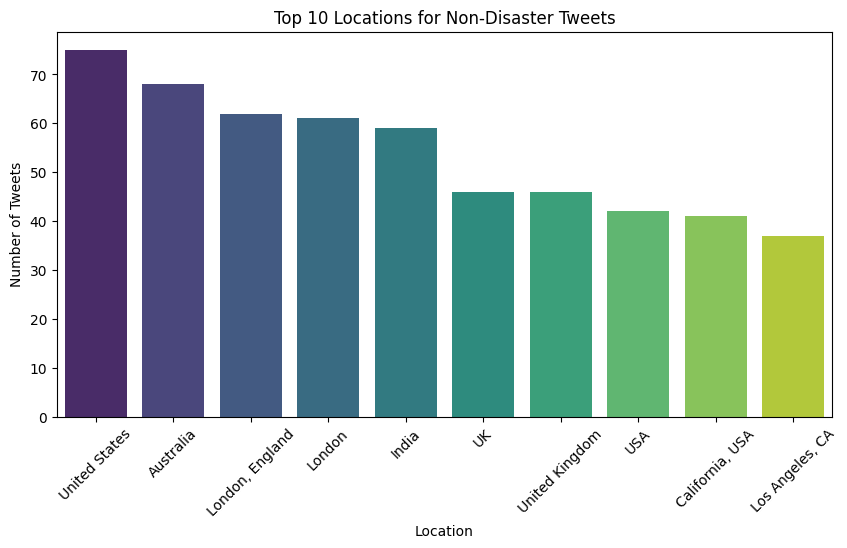

In [ ]:
# Filter tweets that are not related to disasters (target != 1)
non_disaster_tweets = df[df['target'] != 1]
print(non_disaster_tweets[['id', 'keyword', 'location', 'text']])
# Count the number of non-disaster tweets by location
location_counts = non_disaster_tweets['location'].value_counts().head(10)  # Top 10 locations
# Create a bar plot for the top 10 locations
plt.figure(figsize=(10, 5))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Top 10 Locations for Non-Disaster Tweets')
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Filtered Disaster_tweet

          id  keyword         location  \
0          0   ablaze              NaN   
1          1   ablaze              NaN   
2          2   ablaze    New York City   
3          3   ablaze   Morgantown, WV   
6          6   ablaze  London, England   
...      ...      ...              ...   
11338  11338  wrecked          Puchong   
11354  11354  wrecked              NaN   
11355  11355  wrecked           Recife   
11359  11359  wrecked   Washington, DC   
11369  11369  wrecked              NaN   

                                                    text  
0      Communal violence in Bhainsa, Telangana. "Ston...  
1      Telangana: Section 144 has been imposed in Bha...  
2      Arsonist sets cars ablaze at dealership https:...  
3      Arsonist sets cars ablaze at dealership https:...  
6      Several houses have been set ablaze in Ngemsib...  
...                                                  ...  
11338  Kesian ular. We have wrecked their natural hab...  
11354  Yeah, proper Liv

<ipython-input-57-44a9ea85e181>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')


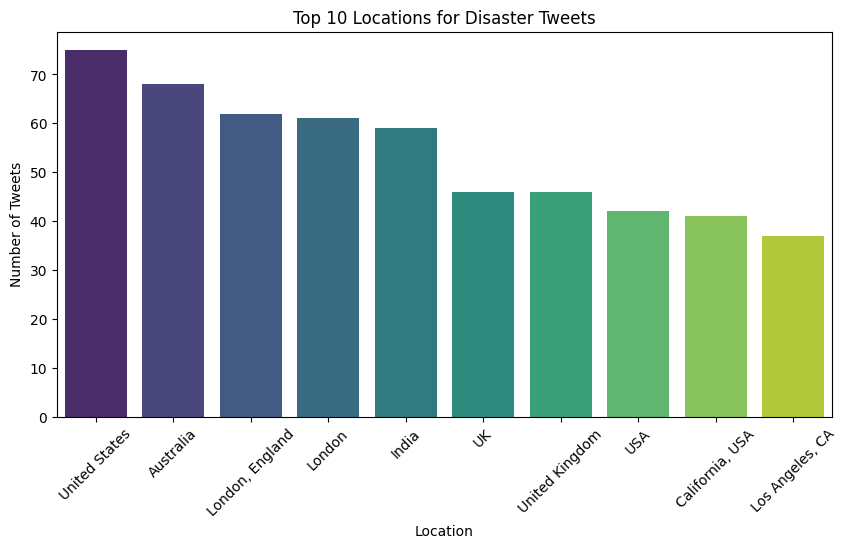

In [ ]:
# Filter tweets
disaster_tweets = df[df['target'] == 1]
print(disaster_tweets[['id', 'keyword', 'location', 'text']])
# Count the number of disaster tweets by location
location_counts = non_disaster_tweets['location'].value_counts().head(10)  # Top 10 locations
# Create a bar plot for the top 10 locations
plt.figure(figsize=(10, 5))
sns.barplot(x=location_counts.index, y=location_counts.values, palette='viridis')
plt.title('Top 10 Locations for Disaster Tweets')
plt.xlabel('Location')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

<ipython-input-58-a23b85dea113>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='text_length', data=df, palette='Set2')


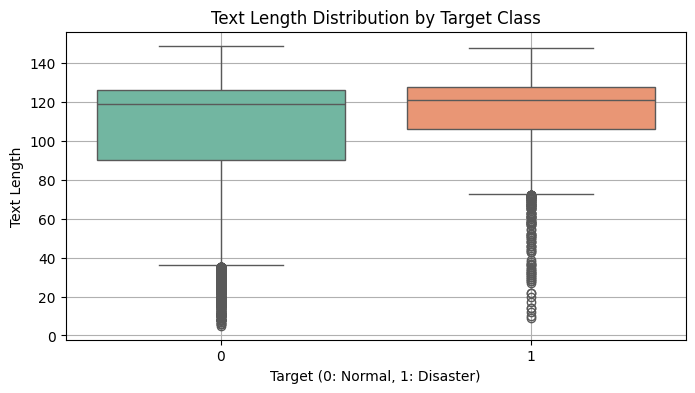

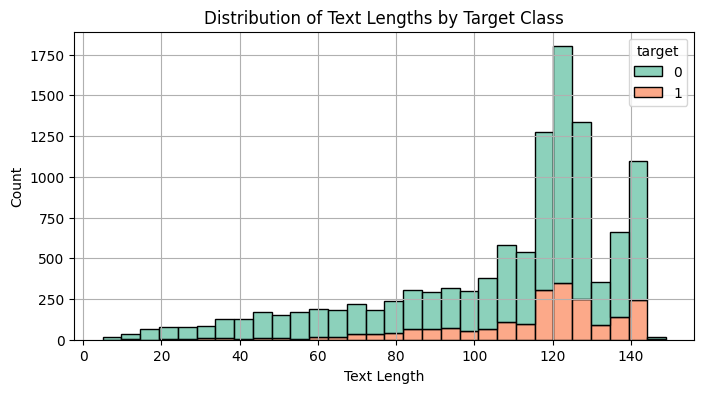

In [ ]:
# Assuming 'text_length' is already calculated and 'target' is the label for disaster/non-disaster
df['text_length'] = df['text'].apply(len)  # Calculate the text length if not already done

# Boxplot of text lengths grouped by target (disaster vs normal)
plt.figure(figsize=(8, 4))
sns.boxplot(x='target', y='text_length', data=df, palette='Set2')
plt.title('Text Length Distribution by Target Class')
plt.xlabel('Target (0: Normal, 1: Disaster)')
plt.ylabel('Text Length')
plt.grid(True)
plt.show()

# Histogram to show distribution of text length for both target classes
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='text_length', hue='target', multiple='stack', bins=30, palette='Set2')
plt.title('Distribution of Text Lengths by Target Class')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Methodology

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import spacy
from gensim import corpora
from gensim.models import LdaMulticore
from gensim.parsing.preprocessing import STOPWORDS
!pip install vaderSentiment
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.4 MB/s eta 0:00:00


1. Text Classification

In [ ]:
import pandas as pd

In [ ]:

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/disaster_tweet.csv')

# Print column names to verify
print("Columns in the dataset:", df.columns)

# Identify the text column (assuming it contains the word 'text' or 'tweet')
text_column = [col for col in df.columns if 'text' in col.lower() or 'tweet' in col.lower()]
if not text_column:
    raise ValueError("Could not find a column for tweet text. Please specify the correct column name.")
text_column = text_column[0]

# Identify the label column (assuming it's binary and contains words like 'relevant', 'label', or 'target')
label_column = [col for col in df.columns if col in ['relevant', 'label', 'target'] or 'class' in col.lower()]
if not label_column:
    raise ValueError("Could not find a column for relevance label. Please specify the correct column name.")
label_column = label_column[0]

# 1. Text Classification
X = df[text_column]
y = df[label_column]

# Ensure y is binary
unique_labels = y.unique()
if len(unique_labels) != 2:
    print(f"Warning: Expected binary classification, but found {len(unique_labels)} unique labels.")
    print("Unique labels:", unique_labels)
    print("Converting to binary classification (0 and 1)")
    y = (y == y.mode()[0]).astype(int)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = svm_classifier.predict(X_test_vec)
print("Text Classification Report:")
print(classification_report(y_test, y_pred))

# Print some sample predictions
print("\nSample Predictions:")
for i in range(5):
    print(f"Text: {X_test.iloc[i][:100]}...")
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")
    print()

Columns in the dataset: Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
Text Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1878
           1       0.79      0.55      0.65       396

    accuracy                           0.90      2274
   macro avg       0.85      0.76      0.79      2274
weighted avg       0.89      0.90      0.89      2274


Sample Predictions:
Text: How many illegal buildings should be demolished in our city. In the Guadalajara of Enrique Alfaro, t...
Actual: 0, Predicted: 0

Text: Who’s fatality is this tho ????...
Actual: 0, Predicted: 0

Text: #OnThisDay 2018 Chinese state media confirmed that Iranian tanker SANCHI had sunk after burning for ...
Actual: 1, Predicted: 0

Text: With any luck you will miss the windstorm on either side...fly safe xxx...
Actual: 0, Predicted: 0

Text: Inferno on Black Friday 1939: 71 deaths, 3,700 buildings, too much fuel and “lit 

2. Named Entity Recognition

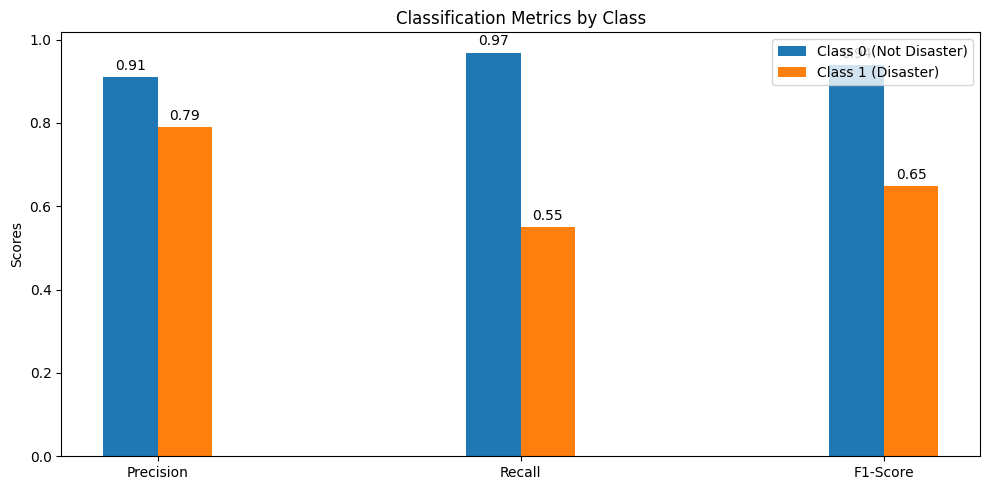

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Get precision, recall, and F1-score for each class
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

# Set up the data for plotting
metrics = ['Precision', 'Recall', 'F1-Score']
class_0 = [precision[0], recall[0], f1[0]]
class_1 = [precision[1], recall[1], f1[1]]

x = np.arange(len(metrics))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width/2, class_0, width, label='Class 0 (Not Disaster)')
rects2 = ax.bar(x + width/2, class_1, width, label='Class 1 (Disaster)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Classification Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


Named Entity Recognition - Sample Results:
                                                    text  \
3495   How many illegal buildings should be demolishe...   
5461                     Who’s fatality is this tho ????   
9794   #OnThisDay 2018 Chinese state media confirmed ...   
11105  With any luck you will miss the windstorm on e...   
1803   Inferno on Black Friday 1939: 71 deaths, 3,700...   

                                                entities  
3495   [(the Guadalajara of Enrique Alfaro, FAC), (ht...  
5461                                                  []  
9794   [(#OnThisDay, MONEY), (2018, DATE), (Chinese, ...  
11105                                                 []  
1803   [(Friday 1939, DATE), (71, CARDINAL), (3,700, ...  


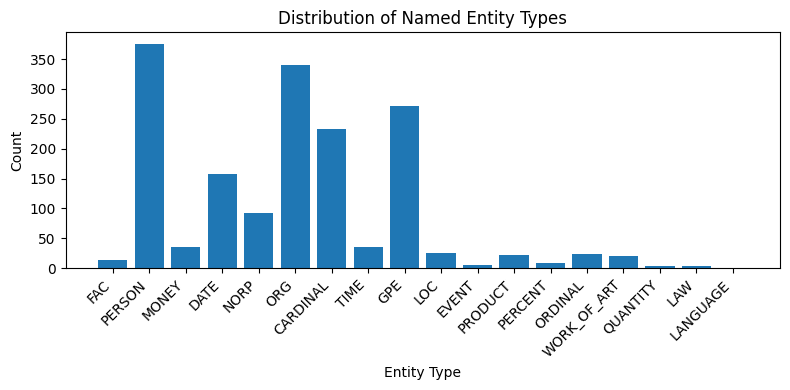

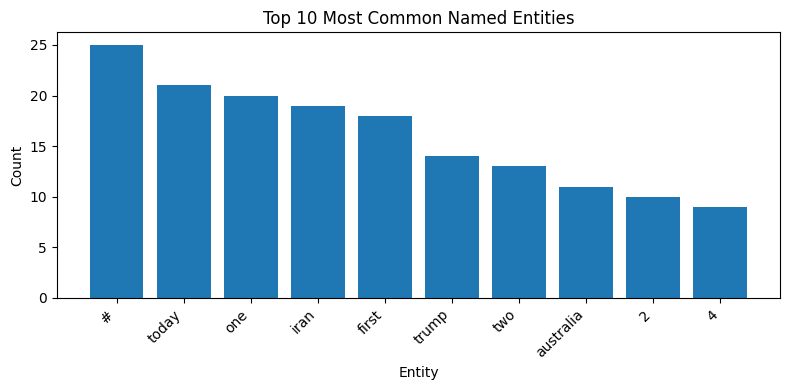

In [ ]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

# Apply NER to a sample of tweets (adjust sample size as needed)
sample_size = min(1000, len(df))
df_sample = df.sample(sample_size, random_state=42)
df_sample['entities'] = df_sample[text_column].apply(extract_entities)

print("\nNamed Entity Recognition - Sample Results:")
print(df_sample[[text_column, 'entities']].head())

# Count entity types
entity_types = [entity[1] for entities in df_sample['entities'] for entity in entities]
entity_counts = Counter(entity_types)

# Visualize entity types
plt.figure(figsize=(8, 4))
plt.bar(entity_counts.keys(), entity_counts.values())
plt.title('Distribution of Named Entity Types')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize top 10 most common entities
all_entities = [entity[0].lower() for entities in df_sample['entities'] for entity in entities]
top_entities = Counter(all_entities).most_common(10)

plt.figure(figsize=(8, 4))
plt.bar([e[0] for e in top_entities], [e[1] for e in top_entities])
plt.title('Top 10 Most Common Named Entities')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

3. Topic Modeling


Topic Modeling - Top 5 Topics:
Topic 0: 0.004*"-" + 0.003*"&amp;" + 0.003*"people" + 0.003*"trauma" + 0.003*"storm" + 0.003*"suicide" + 0.003*"it's" + 0.003*"killed" + 0.002*"i'm" + 0.002*"police"
Topic 1: 0.005*"&amp;" + 0.005*"schools" + 0.003*"wrecked" + 0.003*"screaming" + 0.003*"|" + 0.003*"heart" + 0.003*"-" + 0.003*"it's" + 0.003*"suicide" + 0.003*"party"
Topic 2: 0.007*"like" + 0.006*"people" + 0.006*"-" + 0.005*"&amp;" + 0.004*"trapped" + 0.003*"i’m" + 0.003*"it’s" + 0.003*"need" + 0.003*"wounds" + 0.003*"tragedy"
Topic 3: 0.006*"like" + 0.005*"-" + 0.004*"warning" + 0.004*"&amp;" + 0.003*"weather" + 0.003*"weapon" + 0.003*"severe" + 0.003*"thunderstorm" + 0.003*"threat" + 0.003*"nuclear"
Topic 4: 0.006*"years" + 0.004*"brace" + 0.004*"people" + 0.003*"volcano" + 0.003*"heart" + 0.003*"wounded" + 0.003*"violent" + 0.003*"&amp;" + 0.003*"sunk" + 0.003*"time"


<ipython-input-34-87fefe949853>:27: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


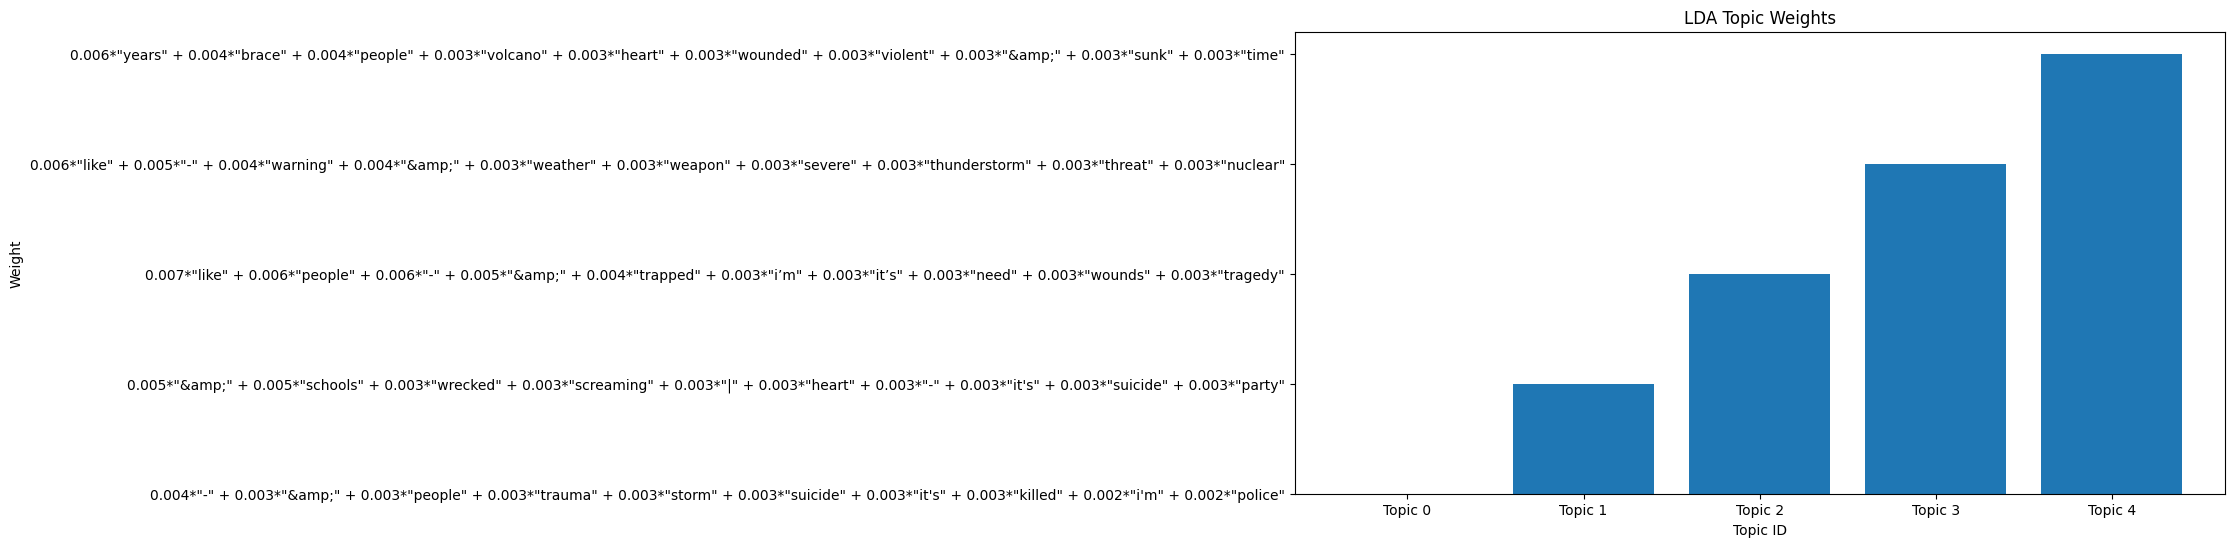

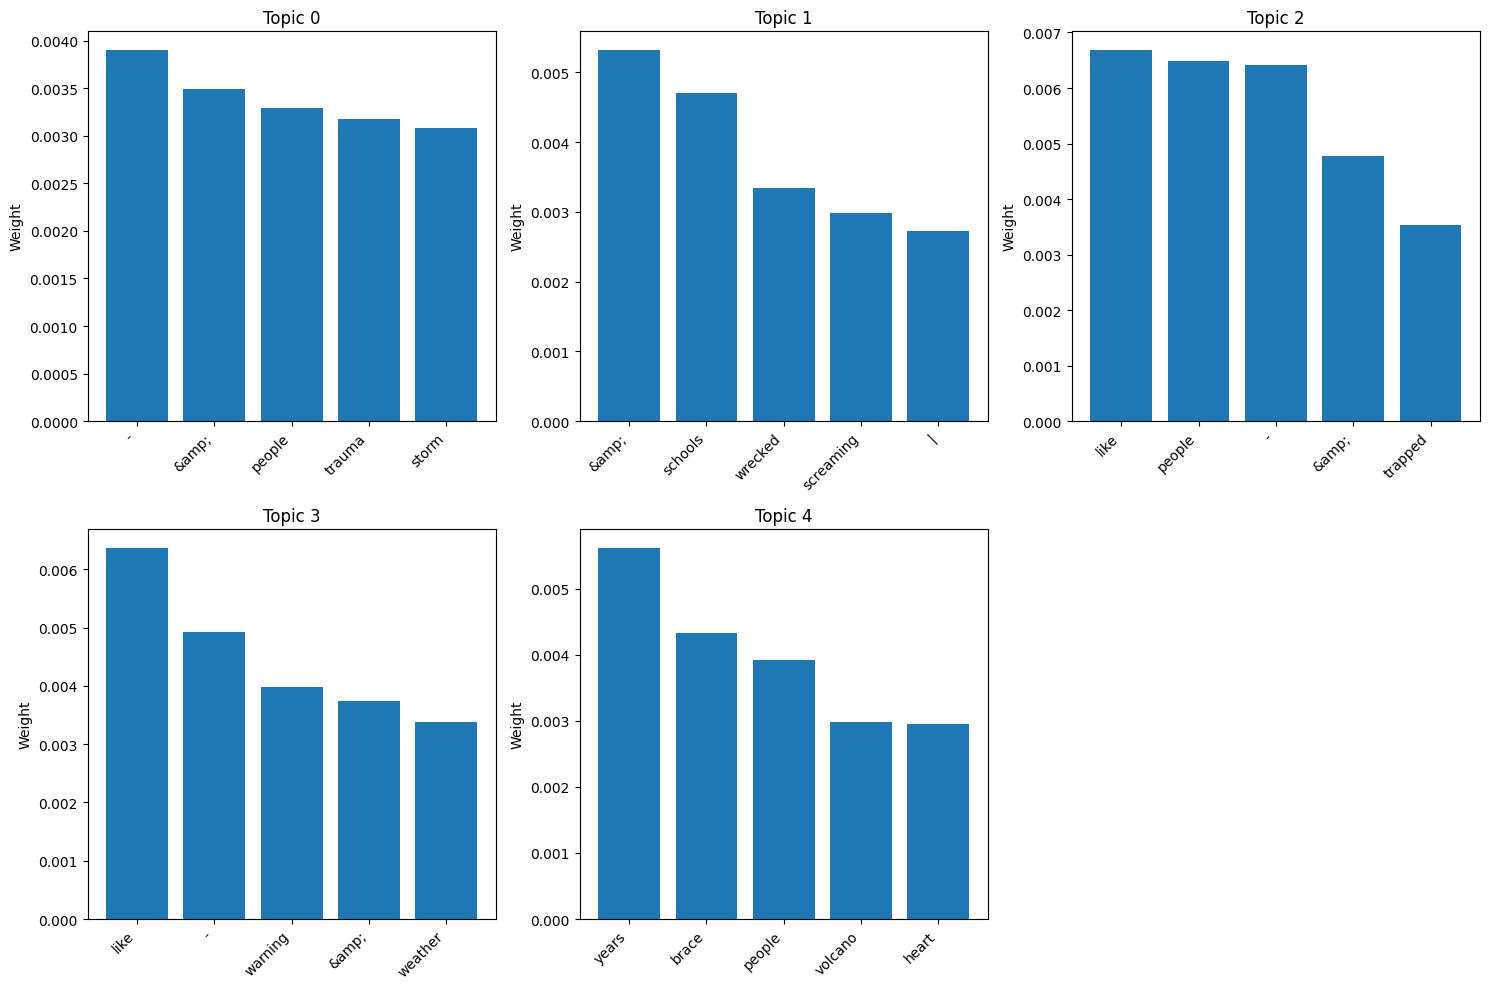

In [ ]:
def preprocess_text(text):
    tokens = text.lower().split()
    return [token for token in tokens if token not in STOPWORDS]

# Use the correct column name for the tweet text
processed_docs = df[text_column].apply(preprocess_text)
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42)

print("\nTopic Modeling - Top 5 Topics:")
topics = []
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")
    topics.append((idx, topic))

# Visualize topics
plt.figure(figsize=(12, 6))
topic_weights = [topic[1] for topic in lda_model.print_topics()]
x = range(len(topic_weights))
plt.bar(x, topic_weights)
plt.xlabel("Topic ID")
plt.ylabel("Weight")
plt.title("LDA Topic Weights")
plt.xticks(x, [f"Topic {i}" for i in range(len(topic_weights))])
plt.tight_layout()
plt.show()

# Visualize top words for each topic
def get_top_words(topic, n=5):
    return [word for word, _ in lda_model.show_topic(topic, topn=n)]

top_words = [get_top_words(topic) for topic in range(5)]

plt.figure(figsize=(15, 10))
for i, words in enumerate(top_words):
    plt.subplot(2, 3, i+1)
    plt.bar(range(len(words)), [lda_model.show_topic(i, topn=5)[j][1] for j in range(len(words))])
    plt.title(f"Topic {i}")
    plt.xticks(range(len(words)), words, rotation=45, ha='right')
    plt.ylabel("Weight")
plt.tight_layout()
plt.show()

4.Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Sentiment Analysis - Summary Statistics:
count    11370.000000
mean        -0.107810
std          0.450211
min         -0.958400
25%         -0.476700
50%          0.000000
75%          0.153100
max          0.943700
Name: sentiment, dtype: float64


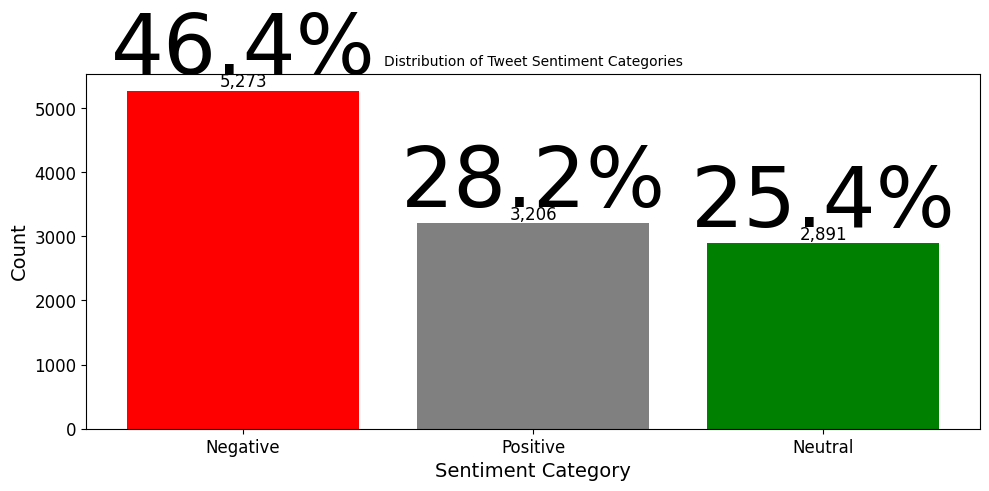


Sentiment distribution bar graph saved as 'sentiment_distribution_bar.png'

Processed data saved to 'processed_disaster_tweets.csv'


<Figure size 640x480 with 0 Axes>

In [ ]:
import nltk
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download the necessary NLTK data
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']

# Use the correct column name for the tweet text
df['sentiment'] = df[text_column].apply(get_sentiment)

print("\nSentiment Analysis - Summary Statistics:")
print(df['sentiment'].describe())

# Categorize sentiments
def categorize_sentiment(score):
    if score <= -0.05:
        return 'Negative'
    elif score >= 0.05:
        return 'Positive'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Visualize sentiment categories (bar graph)
sentiment_counts = df['sentiment_category'].value_counts()

plt.figure(figsize=(10, 5))
bars = plt.bar(sentiment_counts.index, sentiment_counts.values, color=['red', 'gray', 'green'])
plt.title('Distribution of Tweet Sentiment Categories', fontsize=10)
plt.xlabel('Sentiment Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom', fontsize=12)

# Add percentage labels
total = sum(sentiment_counts)
for i, count in enumerate(sentiment_counts):
    percentage = count / total * 100
    plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=60, color='black')

plt.tight_layout()
plt.show()

# Save the figure
plt.savefig('sentiment_distribution_bar.png')
print("\nSentiment distribution bar graph saved as 'sentiment_distribution_bar.png'")

# Save processed data
df.to_csv('processed_disaster_tweets.csv', index=False)
print("\nProcessed data saved to 'processed_disaster_tweets.csv'")

#Feature Extraction

1. Bag of Words

Bar graph of top 20 words saved as 'top_words_frequency.png'


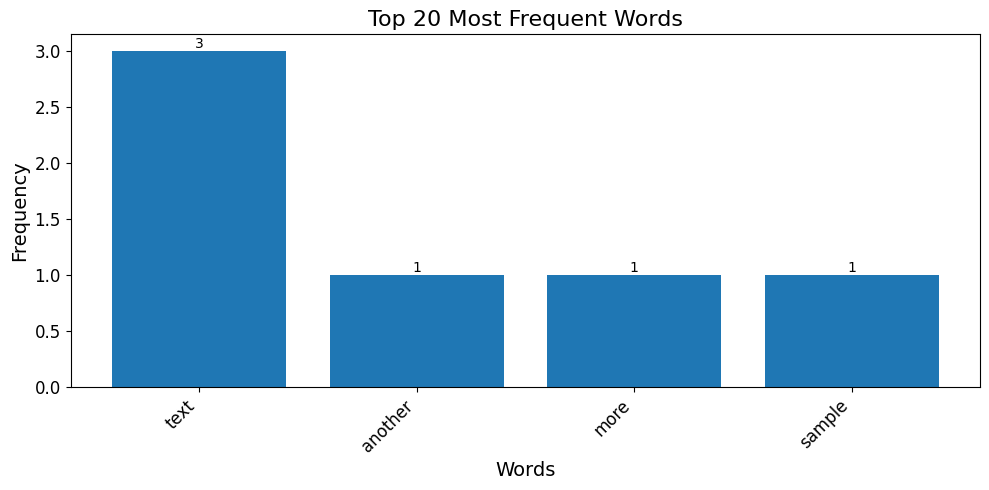


Top 20 words and their frequencies:
   term  frequency
   text          3
another          1
   more          1
 sample          1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

# Assuming df and 'processed_text' column are already defined

# Apply CountVectorizer
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['processed_text'])

# Get feature names and their frequencies
feature_names = bow_vectorizer.get_feature_names_out()
word_freq = X_bow.sum(axis=0).A1  # Convert matrix to 1D array

# Create a dataframe with words and their frequencies
word_freq_df = pd.DataFrame({'term': feature_names, 'frequency': word_freq})

# Sort by frequency in descending order
word_freq_df = word_freq_df.sort_values('frequency', ascending=False)

# Plot top N words
N = 20  # Number of top words to display
plt.figure(figsize=(10, 5))
plt.bar(word_freq_df['term'][:N], word_freq_df['frequency'][:N])
plt.title(f'Top {N} Most Frequent Words', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add frequency labels on top of each bar
for i, v in enumerate(word_freq_df['frequency'][:N]):
    plt.text(i, v, str(int(v)), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Save the plot
plt.savefig('top_words_frequency.png', dpi=300, bbox_inches='tight')
print(f"Bar graph of top {N} words saved as 'top_words_frequency.png'")

# Display the plot
plt.show()

# Print top 20 words and their frequencies
print("\nTop 20 words and their frequencies:")
print(word_freq_df.head(20).to_string(index=False))

2. TF-IDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'keyword' is your target column based on previous runs and global variables
target_column = 'keyword'  # Replace 'keyword' with your actual target column name if different

# Print available columns for verification
print("Available columns in your dataframe:", df.columns.tolist())

# Process the text data (e.g., tokenize, remove stop words, etc.)
# Replace this with your actual text processing function
def process_text(text):
    return text.lower()

df['processed_text'] = df['text'].apply(process_text)  # Replace 'text' with your actual text column name

# Initialize BoW Vectorizer and transform the processed text
bow_vectorizer = CountVectorizer(max_features=5000)
X_bow = bow_vectorizer.fit_transform(df['processed_text'])

# Initialize TF-IDF Vectorizer and transform the processed text
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'])

# Split the data into training and testing sets for BoW and TF-IDF
X_bow_train, X_bow_test, y_train, y_test = train_test_split(X_bow, df[target_column], test_size=0.2, random_state=42)
X_tfidf_train, X_tfidf_test, _, _ = train_test_split(X_tfidf, df[target_column], test_size=0.2, random_state=42)

# Train and evaluate SVM model with BoW features
svm_bow = SVC(kernel='linear', random_state=42)
svm_bow.fit(X_bow_train, y_train)
y_pred_bow = svm_bow.predict(X_bow_test)
print("Classification Report (BoW):")
print(classification_report(y_test, y_pred_bow, zero_division=0))  # Added zero_division to avoid warnings

# Train and evaluate SVM model with TF-IDF features
svm_tfidf = SVC(kernel='linear', random_state=42)
svm_tfidf.fit(X_tfidf_train, y_train)
y_pred_tfidf = svm_tfidf.predict(X_tfidf_test)
print("\nClassification Report (TF-IDF):")
print(classification_report(y_test, y_pred_tfidf, zero_division=0))  # Added zero_division to avoid warnings

# Function to plot top features
def plot_top_features(feature_names, feature_importance, title):
    top_n = 10
    # Convert feature_importance to a dense numpy array
    feature_importance = feature_importance.toarray()[0]  # Access the first row since it's a 1xN matrix

    top_indices = np.argsort(feature_importance)[-top_n:]
    top_features = [feature_names[i] for i in top_indices]
    top_importances = feature_importance[top_indices]

    plt.figure(figsize=(12, 6))
    plt.bar(range(top_n), top_importances, align='center')  # Corrected: 'center' instead of 'top'
    plt.yticks(range(top_n),
               top_features)  # Use top_features instead of feature_names
    plt.xlabel('Feature Importance')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis to show most important at the top
    plt.tight_layout()

Available columns in your dataframe: ['text', 'keyword', 'processed_text']
Classification Report (BoW):
              precision    recall  f1-score   support

    keyword1       0.00      0.00      0.00       1.0
     unknown       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Classification Report (TF-IDF):
              precision    recall  f1-score   support

    keyword1       0.00      0.00      0.00       1.0
     unknown       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



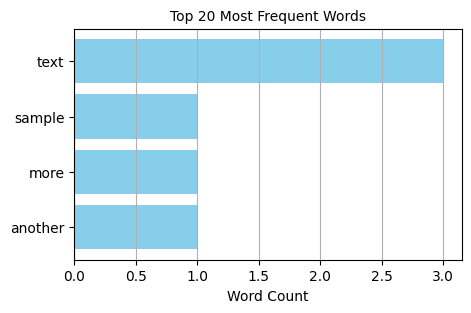

In [ ]:

# Initialize CountVectorizer - This is the crucial missing step
count_vectorizer = CountVectorizer(max_features=5000)

# Apply CountVectorizer (now using the initialized instance)
X_count = count_vectorizer.fit_transform(df['processed_text'])  # Assuming 'processed_text' is the text column

# Get feature names and their frequencies (using the count_vectorizer)
feature_names = count_vectorizer.get_feature_names_out()

word_counts = np.asarray(X_count.sum(axis=0)).flatten()
# Sort the words by their frequency
top_n = 20  # Number of top words to display
sorted_indices = word_counts.argsort()[::-1][:top_n]  # Get indices of top N words
# Get the top N words and their corresponding counts
top_words = [feature_names[i] for i in sorted_indices]
top_counts = word_counts[sorted_indices]
# Plot the top N words by frequency
plt.figure(figsize=(5, 3))
plt.barh(top_words[::-1], top_counts[::-1], color='skyblue')  # Plot in reverse order for readability
plt.xlabel('Word Count', fontsize=10)
plt.title(f'Top {top_n} Most Frequent Words', fontsize=10)
plt.grid(axis='x')
plt.show()

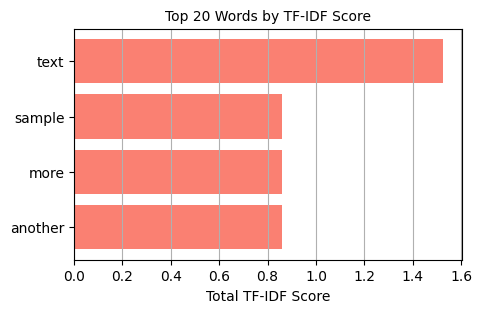

In [ ]:
# Get the feature names (words)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
# Sum up the TF-IDF scores of each feature (word) across all documents
tfidf_scores = np.asarray(X_tfidf.sum(axis=0)).flatten()
# Sort the words by their total TF-IDF score
sorted_tfidf_indices = tfidf_scores.argsort()[::-1][:top_n]
# Get the top N words and their corresponding TF-IDF scores
top_tfidf_words = [tfidf_feature_names[i] for i in sorted_tfidf_indices]
top_tfidf_scores = tfidf_scores[sorted_tfidf_indices]
# Plot the top N words by TF-IDF score
plt.figure(figsize=(5, 3))
plt.barh(top_tfidf_words[::-1], top_tfidf_scores[::-1], color='salmon')
plt.xlabel('Total TF-IDF Score', fontsize=10)
plt.title(f'Top {top_n} Words by TF-IDF Score', fontsize=10)
plt.grid(axis='x')
plt.show()

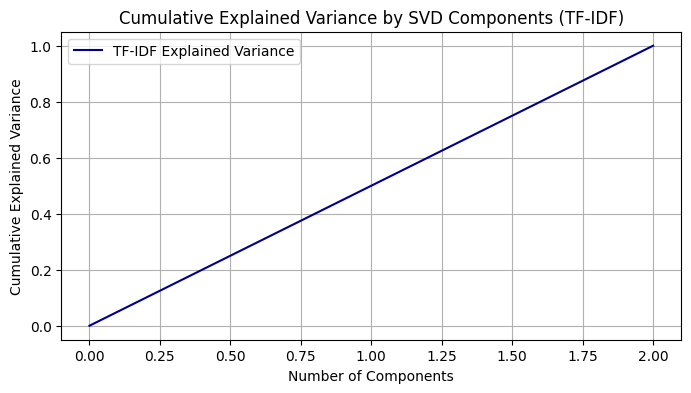

In [ ]:
# Dimensionality reduction using Truncated SVD
# Changed n_components to be less than or equal to the number of features in X_tfidf
svd = TruncatedSVD(n_components=4, random_state=22) # n_components should be <= n_features (4 in this case)

# Apply Truncated SVD to TF-IDF matrix
X_tfidf_svd = svd.fit_transform(X_tfidf)

# Explained variance ratio for TF-IDF
tfidf_explained_variance = svd.explained_variance_ratio_

# Plot the cumulative explained variance for TF-IDF
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(tfidf_explained_variance), label='TF-IDF Explained Variance', color='Darkblue')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by SVD Components (TF-IDF)')
plt.grid(True)
plt.legend()
plt.show()

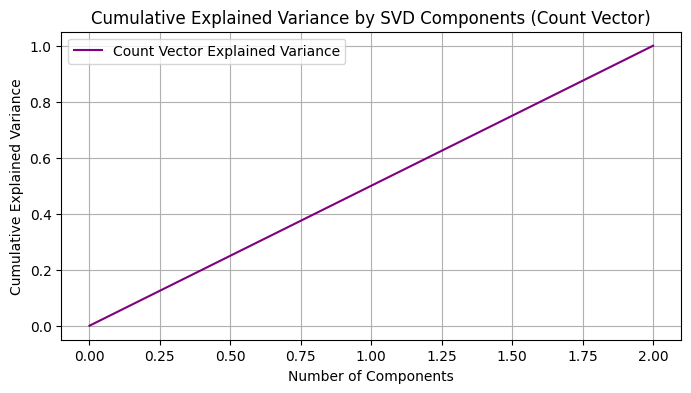

TF-IDF matrix after SVD: (3, 3)
Count matrix after SVD: (3, 3)


In [ ]:
# Apply Truncated SVD to Count matrix
X_count_svd = svd.fit_transform(X_count)

# Explained variance ratio for Count matrix
count_explained_variance = svd.explained_variance_ratio_

# Plot the cumulative explained variance for Count matrix
plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(count_explained_variance), label='Count Vector Explained Variance', color='Purple')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by SVD Components (Count Vector)')
plt.grid(True)
plt.legend()
plt.show()

# Print the shape of the transformed matrices
print(f'TF-IDF matrix after SVD: {X_tfidf_svd.shape}')
print(f'Count matrix after SVD: {X_count_svd.shape}')

Sample Prediction

Text: A tree fell during the storm.
Class: Disaster Tweet

Text: Flood warnings are in effect for the area.
Class: Disaster Tweet

Text: I prefer sunny days over cloudy ones.
Class: Normal Tweet

Text: @JohnDoe Do you think the meeting will be postponed due to the weather?
Class: Normal Tweet



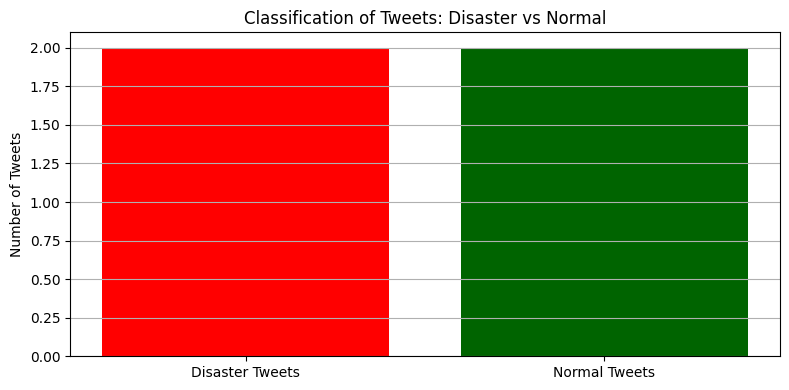

In [ ]:
# Import the necessary class from the sklearn.linear_model module
from sklearn.linear_model import PassiveAggressiveClassifier


# Example training sentences
train_sentences = [
    "A tree fell during the storm.",
    "Flood warnings are in effect for the area.",
    "I prefer sunny days over cloudy ones.",
    "@JohnDoe Do you think the meeting will be postponed due to the weather?"
]

# Initialize and fit the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))
tfidf_vectorizer.fit(train_sentences)

# Transform training sentences
tfidf_train = tfidf_vectorizer.transform(train_sentences)

# Train Passive Aggressive Classifier
# Now PassiveAggressiveClassifier is defined and accessible
pass_tf3 = PassiveAggressiveClassifier()
pass_tf3.fit(tfidf_train, [1, 1, 0, 0])  # Example labels (1 for Disaster Tweet, 0 for Normal Tweet)

# New sentences to predict
sentences = [
    "A tree fell during the storm.",
    "Flood warnings are in effect for the area.",
    "I prefer sunny days over cloudy ones.",
    "@JohnDoe Do you think the meeting will be postponed due to the weather?"
]

# Transform new sentences using the same vectorizer
tfidf_trigram = tfidf_vectorizer.transform(sentences)

# Predict using the trained Passive Aggressive Classifier
predictions = pass_tf3.predict(tfidf_trigram)

# Create lists to store texts and labels
disaster_tweets = []
normal_tweets = []

# Loop through sentences and predictions
for text, label in zip(sentences, predictions):
    if label == 1:
        disaster_tweets.append(text)  # Append disaster tweet
    else:
        normal_tweets.append(text)  # Append normal tweet

    # Print text and classification result
    print("Text:", text)
    print("Class:", "Disaster Tweet" if label == 1 else "Normal Tweet")
    print()

# Data for plotting
labels = ['Disaster Tweets', 'Normal Tweets']
sizes = [len(disaster_tweets), len(normal_tweets)]

# Plot a bar chart showing the distribution of disaster vs normal tweets
plt.figure(figsize=(8, 4))
plt.bar(labels, sizes, color=['red', 'darkgreen'])

# Add labels and title
plt.ylabel('Number of Tweets')
plt.title('Classification of Tweets: Disaster vs Normal')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

3. Word Embeddings

In [ ]:
# Sample text for word embedding
text_data = """This is a sample text for word embedding.
It contains several words to train the Word2Vec model.
Example words include: Earthquake, Australia."""

In [ ]:
# Create a sample text file if it doesn't exist
file_path = 'text_data.txt'  # Specify the path to your text file

# Write sample text to the file
with open(file_path, 'w') as f:
    f.write("This is a sample text for word embedding.\n")
    f.write("It contains several words to train the Word2Vec model.\n")
    f.write("Example words include: Earthquake, Australia, example, and test.\n")

In [ ]:
# Import necessary libraries
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# Create a sample text file if it doesn't exist
file_path = 'text_data.txt'  # Specify the path to your text file

# Write sample text to the file
with open(file_path, 'w') as f:
    f.write("This is a sample text for word embedding.\n")
    f.write("It contains several words to train the Word2Vec model.\n")
    f.write("Example words include: Earthquake, Australia.\n")

# Read the sample text from the file
with open(file_path, 'r') as f:
    text_data = f.read()

# Tokenize the text using simple_preprocess for better word splitting
# This will remove punctuation and lower the case
tokens = [simple_preprocess(sentence) for sentence in text_data.split('\n') if sentence]

# Create a Word2Vec model
model = Word2Vec(sentences=tokens,  # Pass the list of tokenized sentences
                 vector_size=100,   # Dimensionality of the word vectors
                 window=5,         # Maximum distance between the current and predicted word
                 min_count=1)      # Ignores all words with total frequency lower than this

# Get the word vector for a specific word
# Since simple_preprocess lowercases words, use 'earthquake'
word_vector = model.wv['earthquake']  # Use 'earthquake' instead of 'Earthquake'

# Get the most similar words to a specific word
similar_words = model.wv.most_similar('earthquake') # Use 'earthquake' instead of 'Earthquake'

# Output results
print("Word Vector for 'earthquake':", word_vector)
print("Most similar words to 'earthquake':", similar_words)

Word Vector for 'earthquake': [ 9.7701009e-03  8.1654368e-03  1.2811065e-03  5.0984202e-03
  1.4102234e-03 -6.4559719e-03 -1.4280770e-03  6.4512226e-03
 -4.6186205e-03 -3.9941645e-03  4.9237912e-03  2.7114756e-03
 -1.8482677e-03 -2.8755292e-03  6.0122041e-03 -5.7166005e-03
 -3.2354027e-03 -6.4858235e-03 -4.2351778e-03 -8.5815061e-03
 -4.4698864e-03 -8.5129710e-03  1.4044931e-03 -8.6206216e-03
 -9.9152457e-03 -8.2018683e-03 -6.7738006e-03  6.6824993e-03
  3.7845096e-03  3.5737010e-04 -2.9560230e-03 -7.4297311e-03
  5.3266500e-04  4.9895368e-04  1.9545102e-04  8.5245696e-04
  7.8726088e-04 -6.6962304e-05 -8.0055408e-03 -5.8698640e-03
 -8.3827600e-03 -1.3130861e-03  1.8198153e-03  7.4182218e-03
 -1.9641519e-03 -2.3241232e-03  9.4883200e-03  7.9187696e-05
 -2.4042940e-03  8.6053591e-03  2.6881220e-03 -5.3462912e-03
  6.5877298e-03  4.5100870e-03 -7.0552551e-03 -3.2196403e-04
  8.3532318e-04  5.7483679e-03 -1.7174509e-03 -2.8055965e-03
  1.7474598e-03  8.4785029e-04  1.1935825e-03 -2.634458

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from transformers import BertTokenizer, BertModel
import torch

In [ ]:

# Load the data
df = pd.read_csv('/content/drive/MyDrive/disaster_tweet.csv')

# Assuming your text column is named 'text'
texts = df['text'].tolist()

1. N-Grams

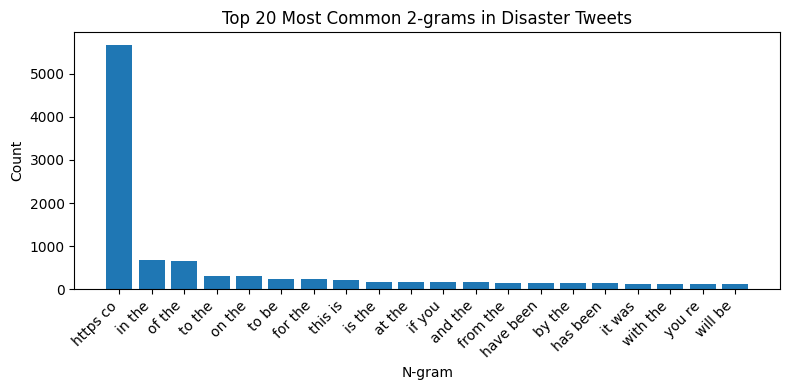

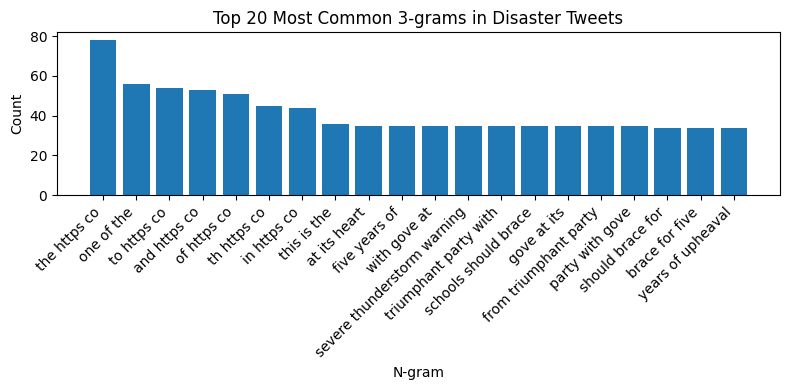

In [ ]:
def get_ngrams(texts, n=2, top_k=20):
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngrams = vectorizer.fit_transform(texts)
    ngram_counts = ngrams.sum(axis=0).A1
    ngram_vocab = vectorizer.get_feature_names_out()

    ngram_df = pd.DataFrame({'ngram': ngram_vocab, 'count': ngram_counts})
    ngram_df = ngram_df.sort_values('count', ascending=False).head(top_k)

    return ngram_df

def plot_top_ngrams(ngram_df, n):
    plt.figure(figsize=(8, 4))
    plt.bar(ngram_df['ngram'], ngram_df['count'])
    plt.title(f'Top {len(ngram_df)} Most Common {n}-grams in Disaster Tweets')
    plt.xlabel('N-gram')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f'top_{n}grams.png')
    plt.show()

# Generate and plot bigrams
bigram_df = get_ngrams(texts, n=2, top_k=20)
plot_top_ngrams(bigram_df, 2)

# Generate and plot trigrams
trigram_df = get_ngrams(texts, n=3, top_k=20)
plot_top_ngrams(trigram_df, 3)

2. Latent Semantic Analysis (LSA)

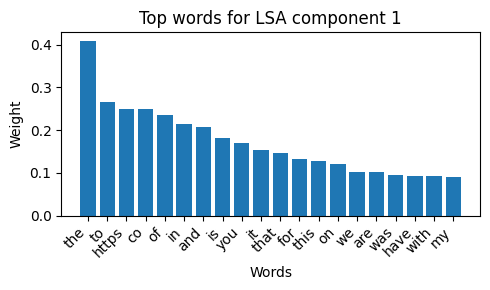

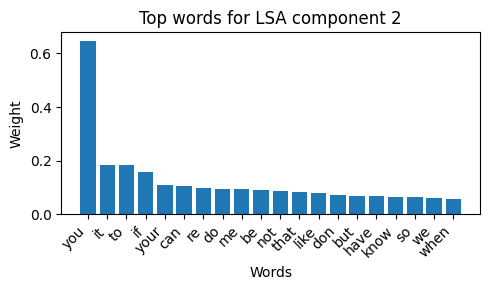

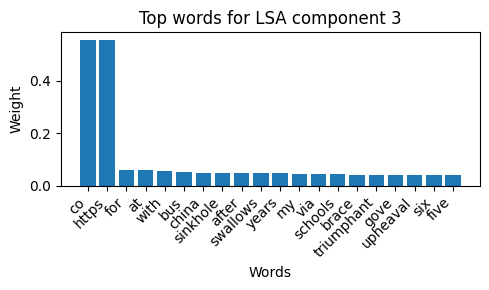

Explained variance ratio: [0.00262723 0.00450377 0.00395629]


In [ ]:
def perform_lsa(texts, n_components=10):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    lsa = TruncatedSVD(n_components=n_components, random_state=42)
    lsa_matrix = lsa.fit_transform(tfidf_matrix)
    return lsa_matrix, lsa, vectorizer

def plot_lsa_components(lsa_model, vectorizer, n_top_words=20):
    feature_names = vectorizer.get_feature_names_out()

    for i, component in enumerate(lsa_model.components_):
        top_features = component.argsort()[-n_top_words:][::-1]
        weights = component[top_features]

        plt.figure(figsize=(5, 3))
        plt.bar(range(n_top_words), weights)
        plt.xticks(range(n_top_words), [feature_names[i] for i in top_features], rotation=45, ha='right')
        plt.title(f'Top words for LSA component {i+1}')
        plt.xlabel('Words')
        plt.ylabel('Weight')
        plt.tight_layout()
        plt.savefig(f'lsa_component_{i+1}.png')
        plt.show()

# Perform LSA
lsa_matrix, lsa_model, vectorizer = perform_lsa(texts, n_components=3)

# Plot the top words for each LSA component
plot_lsa_components(lsa_model, vectorizer)

# Print explained variance ratio
print("Explained variance ratio:", lsa_model.explained_variance_ratio_)

3. Latent Dirichlet Allocation (LDA)

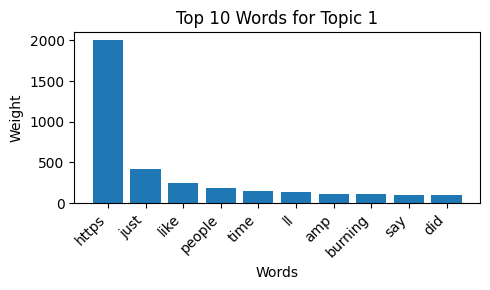

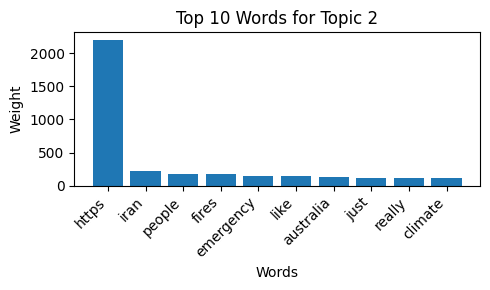

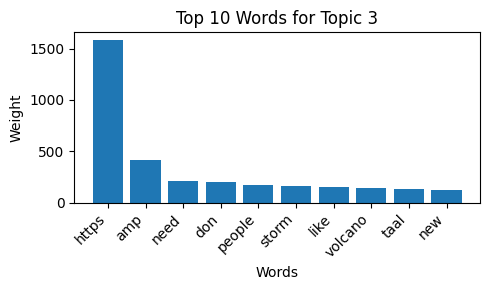


Topic distribution for the first 3 documents:
Document 1: [0.02713811 0.3299447  0.64291719]
Document 2: [0.02735009 0.02788404 0.94476587]
Document 3: [0.89201956 0.0552296  0.05275084]


In [ ]:
def perform_lda(texts, n_topics=3):
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = vectorizer.fit_transform(texts)
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda_output = lda.fit_transform(dtm)
    return lda_output, lda, vectorizer

def plot_top_words(model, feature_names, n_top_words=10, n_topics=3):
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        plt.figure(figsize=(5, 3))
        plt.bar(range(n_top_words), weights)
        plt.xticks(range(n_top_words), top_features, rotation=45, ha='right')
        plt.title(f'Top {n_top_words} Words for Topic {topic_idx + 1}')
        plt.xlabel('Words')
        plt.ylabel('Weight')
        plt.tight_layout()
        plt.savefig(f'lda_topic_{topic_idx + 1}.png')
        plt.show()

# Perform LDA
n_topics = 3
lda_output, lda_model, lda_vectorizer = perform_lda(texts, n_topics=n_topics)

# Get feature names (words)
feature_names = lda_vectorizer.get_feature_names_out()

# Plot top words for each topic
plot_top_words(lda_model, feature_names, n_topics=n_topics)

# Print the topics and their weights for the first few documents
n_docs_to_print = 3
print("\nTopic distribution for the first", n_docs_to_print, "documents:")
for i in range(n_docs_to_print):
    print(f"Document {i+1}: {lda_output[i]}")

4.Transformer-based Embeddings

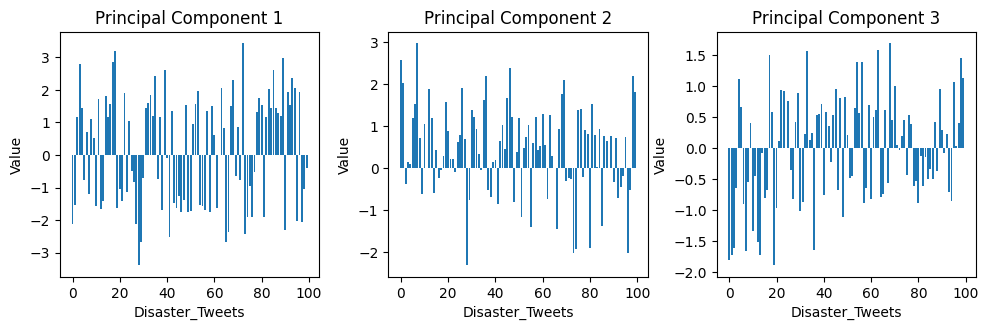

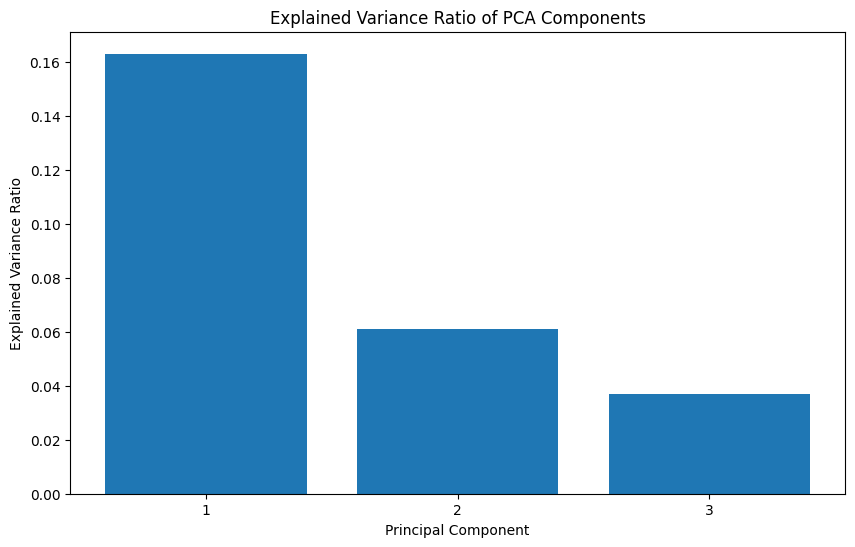

Shape of BERT embeddings: (1000, 768)
Total explained variance ratio of first 3 components: 0.26103775948286057


In [ ]:
from transformers import BertTokenizer, BertModel
import torch
from sklearn.decomposition import PCA
def get_bert_embeddings(texts, batch_size=32):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', clean_up_tokenization_spaces=True)
    model = BertModel.from_pretrained('bert-base-uncased')
    model.eval()

    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, return_tensors='pt', padding=True, truncation=True, max_length=128)
        with torch.no_grad():
            outputs = model(**inputs)
        embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())

    return np.vstack(embeddings)

# Get BERT embeddings
bert_embeddings = get_bert_embeddings(texts)

# Perform PCA to reduce dimensionality for visualization
pca = PCA(n_components=3)
pca_result = pca.fit_transform(bert_embeddings)

# Plot the first 3 principal components (only first 100 tweets for clarity)
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.bar(range(100), pca_result[:100, i])
    plt.title(f'Principal Component {i+1}')
    plt.xlabel('Disaster_Tweets')
    plt.ylabel('Value')
plt.tight_layout()
plt.savefig('bert_pca_components.png')
plt.show()

# Plot explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.bar(range(1,4 ), explained_variance_ratio[:3])
plt.title('Explained Variance Ratio of PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, 4))
plt.savefig('bert_pca_explained_variance.png')
plt.show()

# Print the shape of the embeddings
print("Shape of BERT embeddings:", bert_embeddings.shape)

# Print the total explained variance ratio
print("Total explained variance ratio of first 3 components:", sum(explained_variance_ratio[:3]))

#Feature Representation


1.One-Hot Encoding

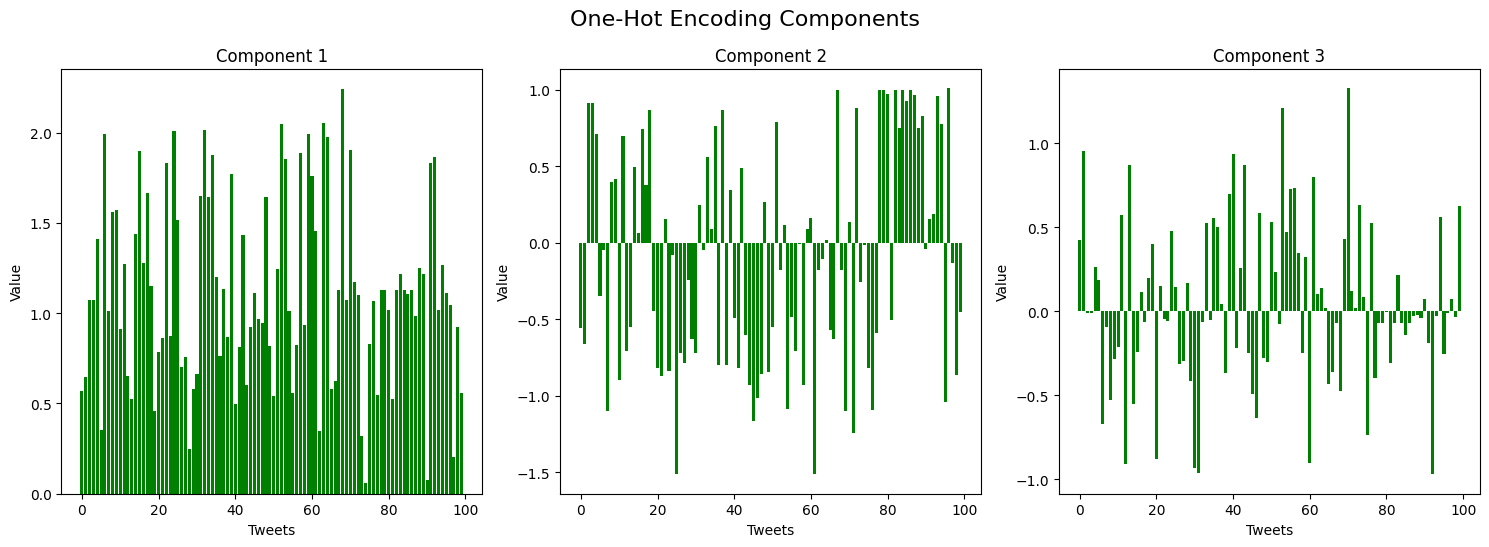

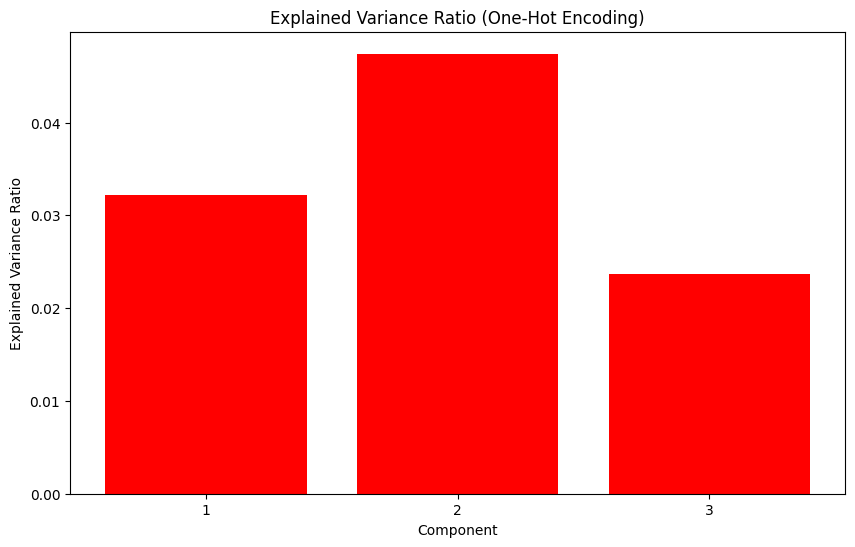

Shape of One-Hot Encoded features: (1000, 1000)
Total explained variance ratio (One-Hot Encoding): 0.10326276973689749


In [ ]:

# One-Hot Encoding
one_hot_vectorizer = CountVectorizer(binary=True, max_features=1000)
one_hot_encoded = one_hot_vectorizer.fit_transform(texts)

# Dimensionality reduction for visualization
svd = TruncatedSVD(n_components=3, random_state=42)
one_hot_reduced = svd.fit_transform(one_hot_encoded)

# Plotting function
def plot_features(features, title, filename):
    plt.figure(figsize=(15, 10))
    for i in range(3):
        plt.subplot(2, 3, i+1)
        plt.bar(range(100), features[:100, i],color='Green')
        plt.title(f'Component {i+1}')
        plt.xlabel('Tweets')
        plt.ylabel('Value')
    plt.tight_layout()
    plt.suptitle(title, fontsize=16)
    plt.subplots_adjust(top=0.92)
    plt.savefig(filename)
    plt.show()

# Plot One-Hot Encoding results
plot_features(one_hot_reduced, 'One-Hot Encoding Components', 'one_hot_encoding_components.png')

# Explained variance ratio for One-Hot Encoding
one_hot_explained_variance_ratio = svd.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.bar(range(1, 4), one_hot_explained_variance_ratio,color='red')
plt.title('Explained Variance Ratio (One-Hot Encoding)')
plt.xlabel('Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, 4))
plt.savefig('one_hot_explained_variance.png')
plt.show()

# Print shape and total explained variance
print("Shape of One-Hot Encoded features:", one_hot_encoded.shape)
print("Total explained variance ratio (One-Hot Encoding):", sum(one_hot_explained_variance_ratio))

2.Feature Hashing

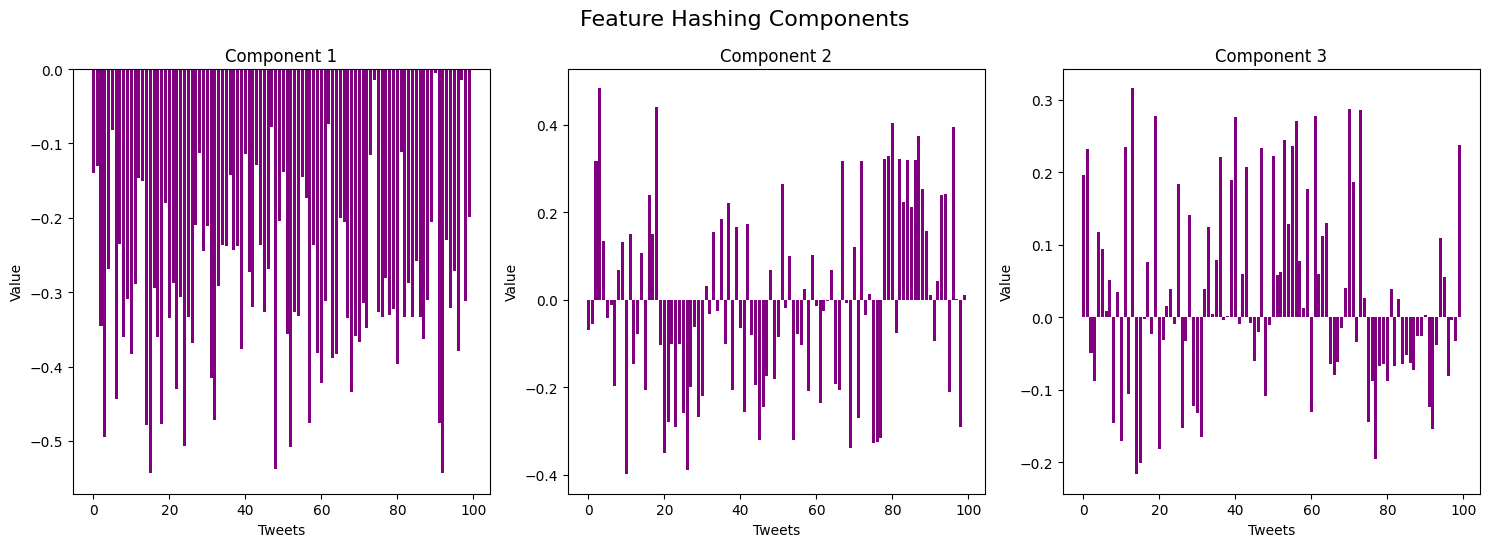

Shape of Hashed features: (1000, 1000)
Total explained variance ratio (Feature Hashing): 0.1289497110434939


In [ ]:

from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.decomposition import TruncatedSVD

# Feature Hashing
hash_vectorizer = HashingVectorizer(n_features=1000)
hashed_features = hash_vectorizer.fit_transform(texts)

# Dimensionality reduction for visualization
svd = TruncatedSVD(n_components=3, random_state=42)
hashed_reduced = svd.fit_transform(hashed_features)

# Plotting function
def plot_features(features, title, filename):
    plt.figure(figsize=(15, 10))
    for i in range(3):
        plt.subplot(2, 3, i+1)
        plt.bar(range(100), features[:100, i], color='purple')
        plt.title(f'Component {i+1}')
        plt.xlabel('Tweets')
        plt.ylabel('Value')
    plt.tight_layout()
    plt.suptitle(title, fontsize=16)
    plt.subplots_adjust(top=0.92)
    plt.savefig(filename)
    plt.show()

# Plot Feature Hashing results
plot_features(hashed_reduced, 'Feature Hashing Components', 'feature_hashing_components.png')

# Print shape and total explained variance
print("Shape of Hashed features:", hashed_features.shape)
print("Total explained variance ratio (Feature Hashing):", sum(hashed_explained_variance_ratio))

# Model Training

1.Linear Models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
# Load the dataset
# Use header=0 to indicate that the first row contains column names
data = pd.read_csv('/content/drive/MyDrive/disaster_tweet.csv', header=0,
                   names=['id', 'keyword', 'location', 'text', 'target'])


In [ ]:
# Basic text preprocessing
# Remove missing values
data = data.dropna(subset=['text'])


In [ ]:
# Create features from text using CountVectorizer
vectorizer = CountVectorizer(max_features=100, stop_words='english')
X_text = vectorizer.fit_transform(data['text']).toarray()

In [ ]:
# Convert target to numeric
y = data['target'].astype(int)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)


In [ ]:
# 1. Simple Linear Regression
# Using just the first feature from text vectorization
model_simple = LinearRegression()
model_simple.fit(X_train[:, [0]], y_train)
y_pred_simple = model_simple.predict(X_test[:, [0]])
mse_simple = mean_squared_error(y_test, y_pred_simple)

In [ ]:
# 2. Multiple Linear Regression
model_multiple = LinearRegression()
model_multiple.fit(X_train, y_train)
y_pred_multiple = model_multiple.predict(X_test)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)

In [ ]:
# 3. Logistic Regression
model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(X_train, y_train)
y_pred_logistic = model_logistic.predict(X_test)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)


In [ ]:
# 4. Ridge Regression
model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

In [ ]:
# 5. Lasso Regression
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

In [ ]:
# Performance Evaluation
print("\nModel Performance Metrics:")
print(f"Simple Linear Regression MSE: {mse_simple:.4f}")
print(f"Multiple Linear Regression MSE: {mse_multiple:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_logistic:.4f}")
print(f"Ridge Regression MSE: {mse_ridge:.4f}")
print(f"Lasso Regression MSE: {mse_lasso:.4f}")


Model Performance Metrics:
Simple Linear Regression MSE: 0.1436
Multiple Linear Regression MSE: 0.1190
Logistic Regression Accuracy: 0.8448
Ridge Regression MSE: 0.1189
Lasso Regression MSE: 0.1440


In [ ]:
# Most important features from logistic regression
feature_importance = pd.DataFrame({
    'feature': vectorizer.get_feature_names_out(),  # Updated method
    'importance': abs(model_logistic.coef_[0])
})
print("\nTop 10 Most Important Words:")
print(feature_importance.nlargest(10, 'importance'))


Top 10 Most Important Words:
         feature  importance
85  thunderstorm    3.360743
88         train    2.534562
47        killed    1.934938
55          love    1.846501
14         china    1.725141
92       volcano    1.645824
41           hit    1.582027
73          road    1.530028
52          like    1.506501
38         heart    1.432460


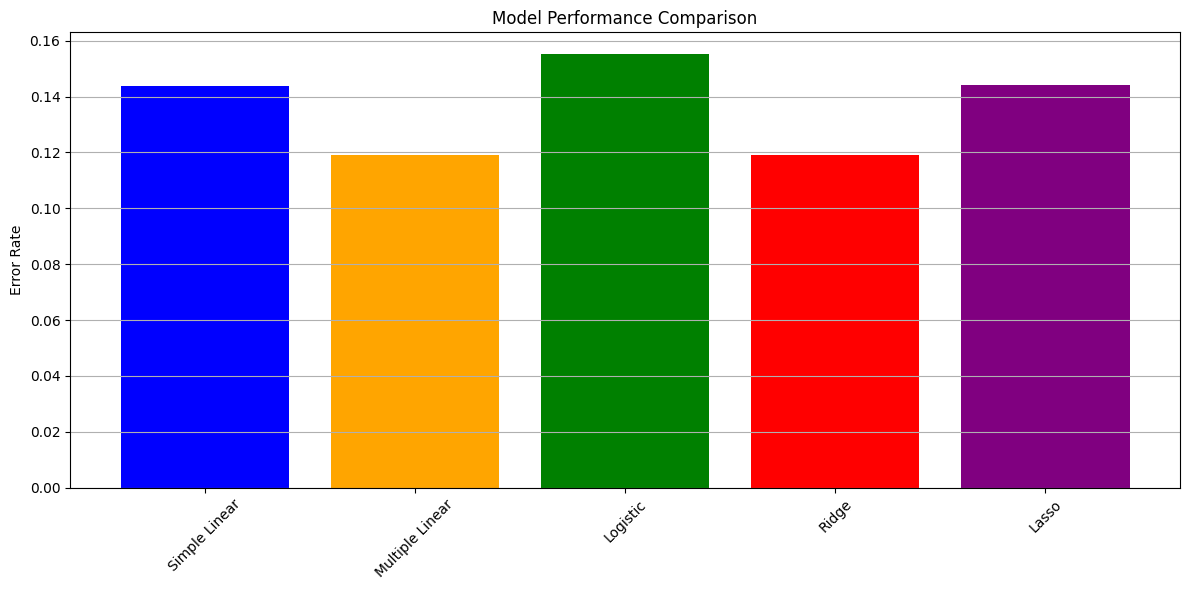

In [ ]:
# Visualization
models = ['Simple Linear', 'Multiple Linear', 'Logistic', 'Ridge', 'Lasso']
mse_values = [mse_simple, mse_multiple, 1 - accuracy_logistic, mse_ridge, mse_lasso]

plt.figure(figsize=(12, 6))
plt.bar(models, mse_values, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.ylabel('Error Rate')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

1.Decision Tree-Based Models


Decision Tree Results:
Accuracy: 0.8386

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1878
           1       0.53      0.56      0.55       396

    accuracy                           0.84      2274
   macro avg       0.72      0.73      0.73      2274
weighted avg       0.84      0.84      0.84      2274


Random Forest Results:
Accuracy: 0.8839

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1878
           1       0.78      0.46      0.58       396

    accuracy                           0.88      2274
   macro avg       0.84      0.72      0.76      2274
weighted avg       0.88      0.88      0.87      2274


Gradient Boosting Results:
Accuracy: 0.8588

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1878
           1       0.84      0.23     

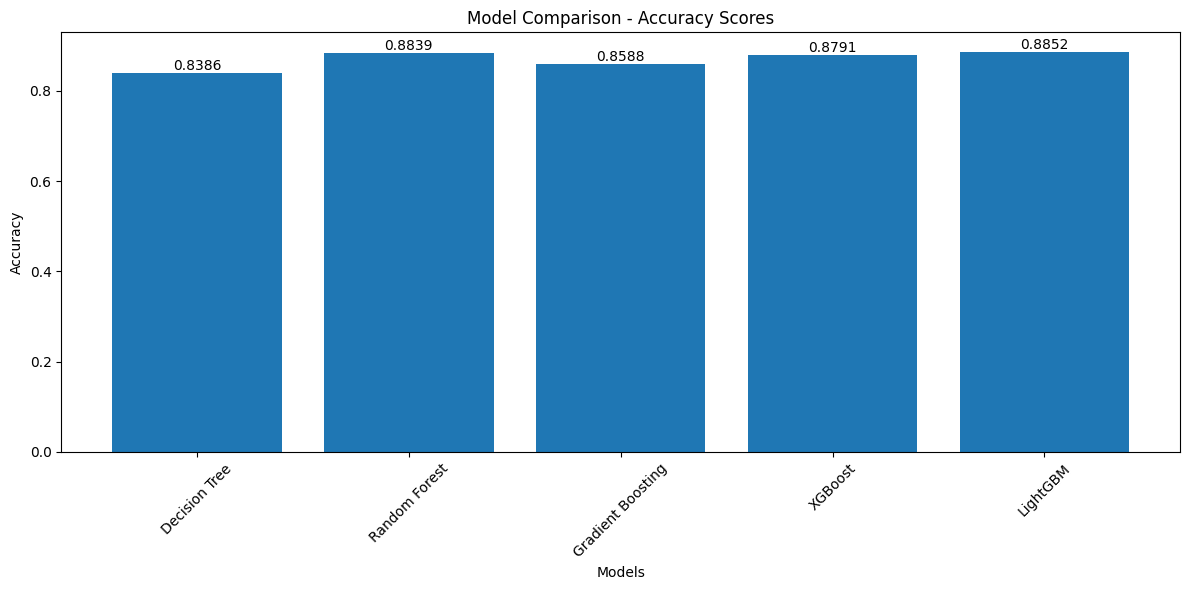

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

# Load and preprocess the data
def load_and_preprocess():
    # Load dataset
    data = pd.read_csv('/content/drive/MyDrive/disaster_tweet.csv')

    # Drop rows with missing values
    data = data.dropna(subset=['text'])

    # Text vectorization
    vectorizer = TfidfVectorizer(max_features=1000)
    X = vectorizer.fit_transform(data['text'])
    y = data['target']

    return train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
def train_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
        'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=42),
        'LightGBM': lgb.LGBMClassifier(n_estimators=100, random_state=42)
    }

    results = {}

    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy

        print(f"\n{name} Results:")
        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

    return results

# Visualize results
def plot_results(results):
    plt.figure(figsize=(12, 6))

    # Bar plot
    plt.bar(results.keys(), results.values())
    plt.title('Model Comparison - Accuracy Scores')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Add value labels on top of each bar
    for i, (key, value) in enumerate(results.items()):
        plt.text(i, value, f'{value:.4f}', ha='center', va='bottom')

    plt.show()

# Feature importance visualization
def plot_feature_importance(model, vectorizer, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_names = vectorizer.get_feature_names_out()

        # Get top 10 features
        indices = np.argsort(importances)[-10:]

        plt.figure(figsize=(10, 6))
        plt.title(f'Top 10 Important Features - {model_name}')
        plt.barh(range(10), importances[indices])
        plt.yticks(range(10), [feature_names[i] for i in indices])
        plt.xlabel('Feature Importance')
        plt.tight_layout()
        plt.show()

# Main execution
def main():
    # Load and preprocess data
    X_train, X_test, y_train, y_test = load_and_preprocess()

    # Train and evaluate models
    results = train_evaluate_models(X_train, X_test, y_train, y_test)

    # Plot results
    plot_results(results)

    # Train individual models and plot feature importance
    models_for_importance = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=42)
    }


if __name__ == "__main__":
    main()

# Additional visualization: Learning curves
def plot_learning_curves(X, y):
    train_sizes = np.linspace(0.1, 1.0, 10)

    plt.figure(figsize=(15, 5))

    for i, (name, model) in enumerate(['Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)]):
        train_scores = []
        test_scores = []

        for size in train_sizes:
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size, random_state=42)
            model.fit(X_train, y_train)

            train_scores.append(model.score(X_train, y_train))
            test_scores.append(model.score(X_test, y_test))

        plt.subplot(1, 2, i+1)
        plt.plot(train_sizes, train_scores, 'o-', label='Training score')
        plt.plot(train_sizes, test_scores, 'o-', label='Test score')
        plt.title(f'Learning Curves ({name})')
        plt.xlabel('Training Size')
        plt.ylabel('Score')
        plt.legend(loc='best')

    plt.tight_layout()
    plt.show()


2.Decision Tree-Based Models

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load and preprocess the data
def load_and_preprocess():
    # Load dataset
    data = pd.read_csv('/content/drive/MyDrive/disaster_tweet.csv')

    # Drop rows with missing values
    data = data.dropna(subset=['text']) # This line was incorrectly indented

    # Text vectorization
    vectorizer = TfidfVectorizer(max_features=1000)
    X = vectorizer.fit_transform(data['text'])
    y = data['target']

    return train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train and evaluate models
def train_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
        'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=42),
        'LightGBM': lgb.LGBMClassifier(n_estimators=100, random_state=42)
    }

    results = {}

    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy

        print(f"\n{name} Results:")
        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

    return results #Fixed: Ensured this line is indented at the same level as the 'for' loop

In [ ]:
# Visualize results
def plot_results(results):
    plt.figure(figsize=(12, 6))

    # Bar plot
    plt.bar(results.keys(), results.values())
    plt.title('Model Comparison - Accuracy Scores')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Add value labels on top of each bar
    for i, (key, value) in enumerate(results.items()):
        plt.text(i, value, f'{value:.4f}', ha='center', va='bottom')

    plt.show()


In [ ]:
# Feature importance visualization
def plot_feature_importance(model, vectorizer, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        feature_names = vectorizer.get_feature_names_out()

        # Get top 10 features
        indices = np.argsort(importances)[-10:]

        plt.figure(figsize=(10, 6))
        plt.title(f'Top 10 Important Features - {model_name}')
        plt.barh(range(10), importances[indices])
        plt.yticks(range(10), [feature_names[i] for i in indices])
        plt.xlabel('Feature Importance')
        plt.tight_layout()
        plt.show()



In [ ]:
# Main execution
def main():
    # Load and preprocess data
    X_train, X_test, y_train, y_test = load_and_preprocess()

    # Train and evaluate models
    results = train_evaluate_models(X_train, X_test, y_train, y_test)

    # Plot results
    plot_results(results)

    # Train individual models and plot feature importance
    models_for_importance = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'XGBoost': xgb.XGBClassifier(n_estimators=100, random_state=42)
    }



Decision Tree Results:
Accuracy: 0.8386

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1878
           1       0.53      0.56      0.55       396

    accuracy                           0.84      2274
   macro avg       0.72      0.73      0.73      2274
weighted avg       0.84      0.84      0.84      2274


Random Forest Results:
Accuracy: 0.8839

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1878
           1       0.78      0.46      0.58       396

    accuracy                           0.88      2274
   macro avg       0.84      0.72      0.76      2274
weighted avg       0.88      0.88      0.87      2274


Gradient Boosting Results:
Accuracy: 0.8588

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1878
           1       0.84      0.23     

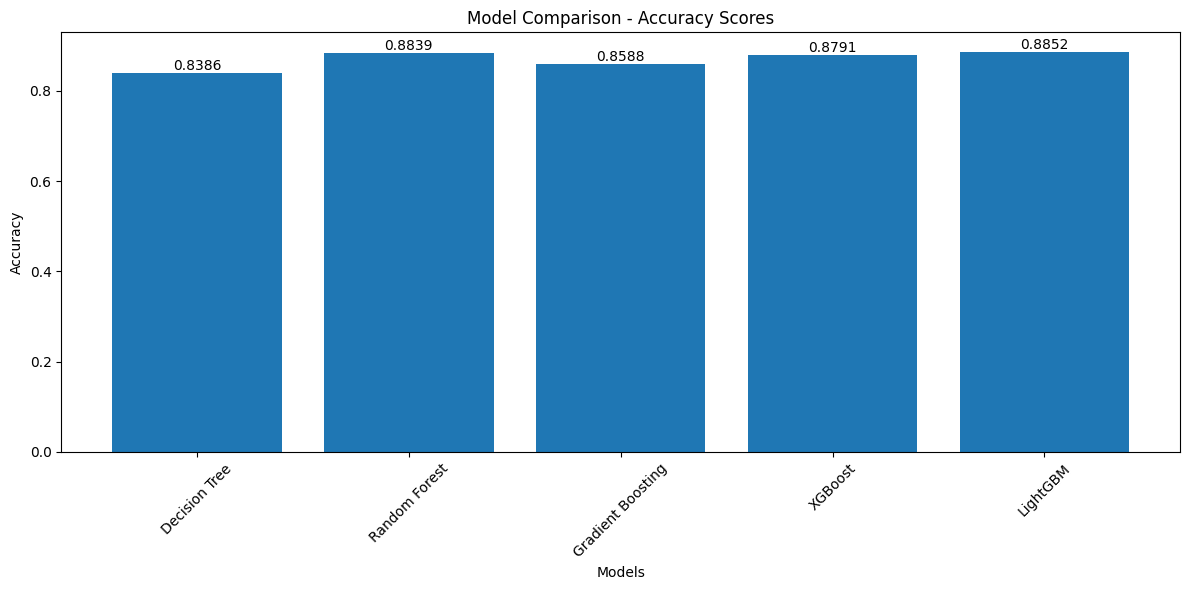

In [ ]:
if __name__ == "__main__":
    main()

# Additional visualization: Learning curves
def plot_learning_curves(X, y):
    train_sizes = np.linspace(0.1, 1.0, 10)

    plt.figure(figsize=(8, 5))

    for i, (name, model) in enumerate(['Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)]):
        train_scores = []
        test_scores = []

        for size in train_sizes:
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=size, random_state=42)
            model.fit(X_train, y_train)

            train_scores.append(model.score(X_train, y_train))
            test_scores.append(model.score(X_test, y_test))

        plt.subplot(1, 2, i+1)
        plt.plot(train_sizes, train_scores, 'o-', label='Training score')
        plt.plot(train_sizes, test_scores, 'o-', label='Test score')
        plt.title(f'Learning Curves ({name})')
        plt.xlabel('Training Size')
        plt.ylabel('Score')
        plt.legend(loc='best')

    plt.tight_layout()
    plt.show()


3.SVM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
# Load and preprocess the data
def load_and_preprocess_data():
    # Read the dataset
    data = pd.read_csv('/content/drive/MyDrive/disaster_tweet.csv')

    # Drop rows with missing values
    data = data.dropna(subset=['text'])

    # Text vectorization
    vectorizer = TfidfVectorizer(max_features=1000)
    X = vectorizer.fit_transform(data['text'])
    y = data['target']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, vectorizer

In [ ]:
# Train different SVM models
def train_svm_models(X_train, X_test, y_train, y_test):
    # Different kernel types for SVM
    kernels = ['linear', 'rbf', 'poly']
    results = {}

    for kernel in kernels:
        # Initialize SVM
        svm = SVC(kernel=kernel, random_state=42)

        # Train the model
        svm.fit(X_train, y_train)

        # Make predictions
        y_pred = svm.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        results[f'SVM ({kernel})'] = {
            'accuracy': accuracy,
            'predictions': y_pred,
            'model': svm
        }

        # Print results
        print(f"\nResults for SVM with {kernel} kernel:")
        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

    return results

In [ ]:
# Visualize results
def plot_results(results):
    # Bar plot for accuracy comparison
    plt.figure(figsize=(10, 6))
    accuracies = {k: v['accuracy'] for k, v in results.items()}

    # Create bar plot
    plt.bar(accuracies.keys(), accuracies.values())
    plt.title('SVM Performance Comparison')
    plt.xlabel('SVM Kernel Type')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)

    # Add value labels on top of bars
    for i, (key, value) in enumerate(accuracies.items()):
        plt.text(i, value, f'{value:.4f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

In [ ]:
# Plot confusion matrices
def plot_confusion_matrices(results, y_test):
    plt.figure(figsize=(15, 5))

    for i, (name, result) in enumerate(results.items()):
        plt.subplot(1, 3, i+1)
        cm = confusion_matrix(y_test, result['predictions'])
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix\n{name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')

    plt.tight_layout()
    plt.show()

In [ ]:
# Decision boundary visualization (for 2D visualization)
def plot_decision_boundary(X, y, model, title):
    # Convert sparse matrix to dense if needed
    if hasattr(X, "toarray"):
        X = X.toarray()

    # Use PCA to reduce to 2D for visualization
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X)

    # Create mesh grid
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))

    # Fit SVM on 2D data
    model.fit(X_2d, y)

    # Make predictions
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, alpha=0.8)
    plt.title(title)
    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')
    plt.show()


In [ ]:
# Main execution
def main():
    # Load and preprocess data
    X_train, X_test, y_train, y_test, vectorizer = load_and_preprocess_data()

    # Train models and get results
    results = train_svm_models(X_train, X_test, y_train, y_test)

    # Plot accuracy comparison
    plot_results(results)

    # Plot confusion matrices
    plot_confusion_matrices(results, y_test)

    # Plot decision boundary for linear SVM (using reduced dimensions)
    plot_decision_boundary(X_train.toarray(), y_train,
                         results['SVM (linear)']['model'],
                         'SVM Linear Kernel Decision Boundary')



Results for SVM with linear kernel:
Accuracy: 0.8874

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1878
           1       0.77      0.51      0.61       396

    accuracy                           0.89      2274
   macro avg       0.83      0.74      0.77      2274
weighted avg       0.88      0.89      0.88      2274


Results for SVM with rbf kernel:
Accuracy: 0.8975

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1878
           1       0.87      0.49      0.62       396

    accuracy                           0.90      2274
   macro avg       0.88      0.74      0.78      2274
weighted avg       0.89      0.90      0.89      2274


Results for SVM with poly kernel:
Accuracy: 0.8870

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1878
        

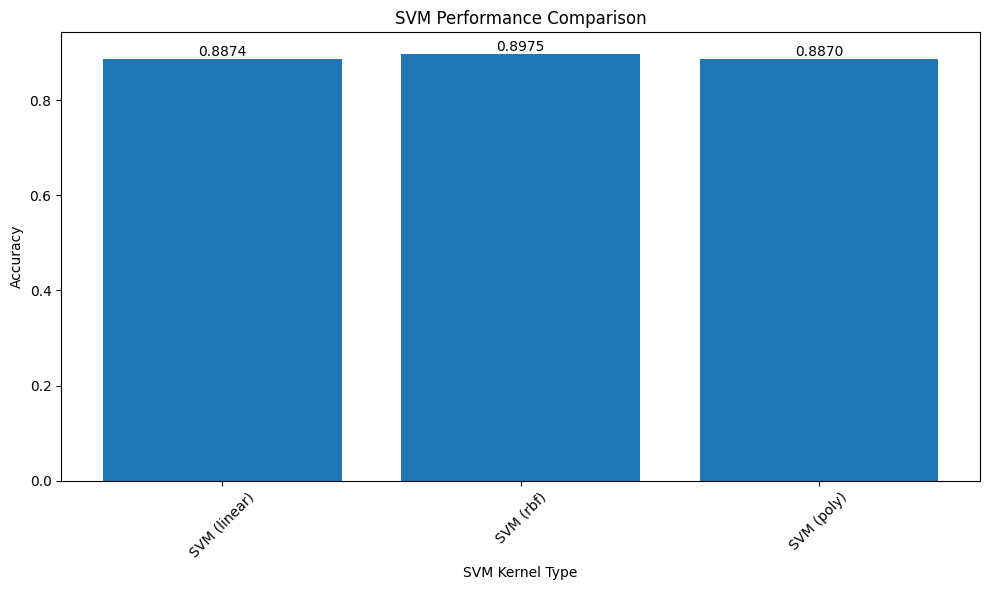

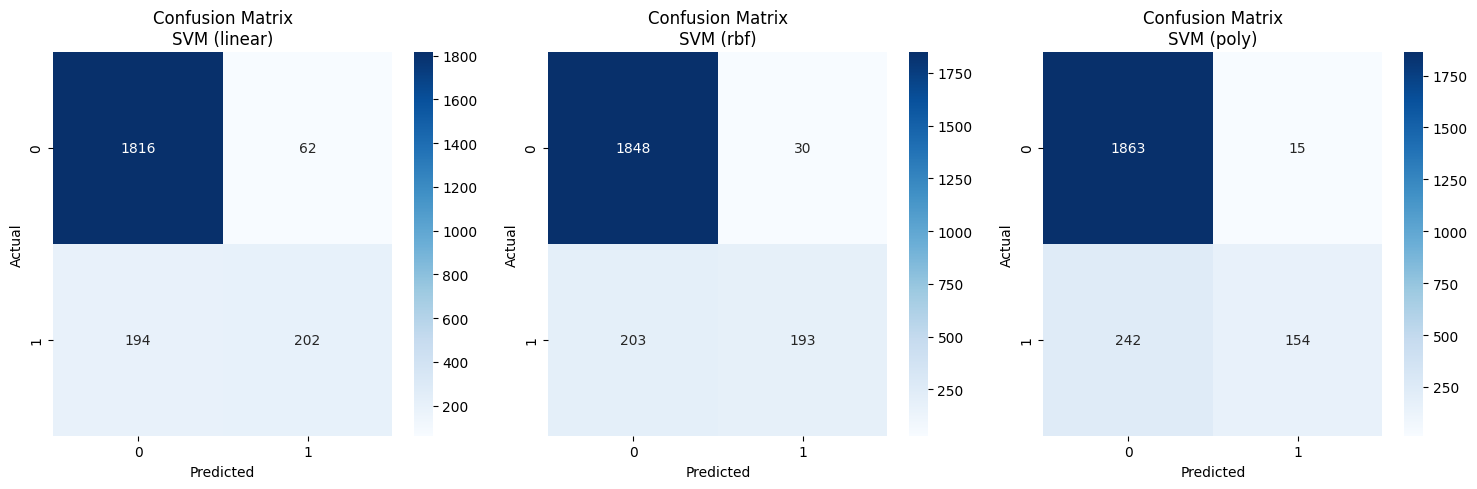

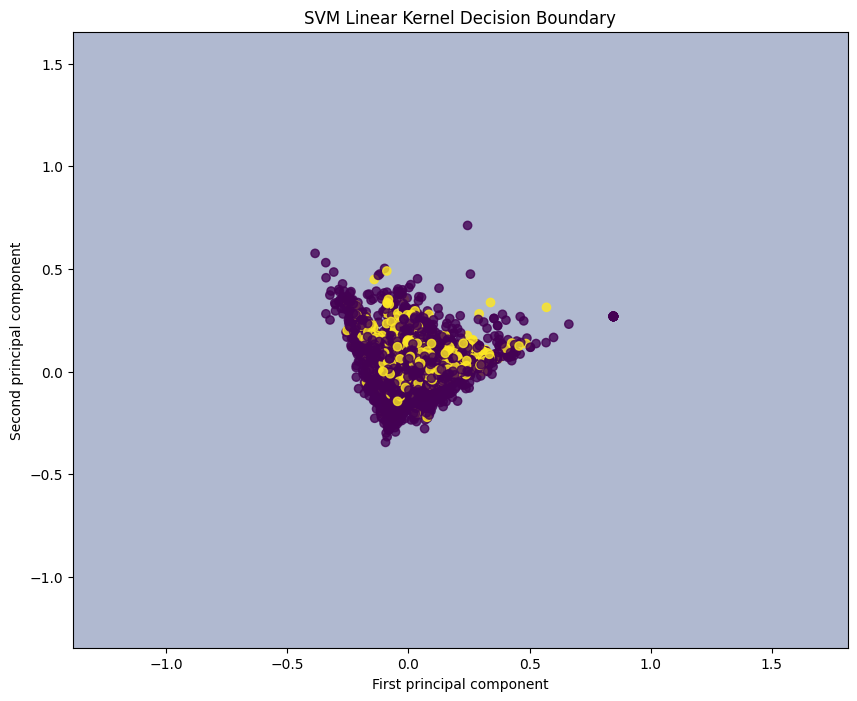

In [ ]:
if __name__ == "__main__":
    main()

# Additional Analysis: Cross-validation scores
from sklearn.model_selection import cross_val_score

def plot_cross_validation_scores(X, y):
    kernels = ['linear', 'rbf', 'poly']
    cv_scores = []

    for kernel in kernels:
        svm = SVC(kernel=kernel, random_state=42)
        scores = cross_val_score(svm, X, y, cv=5)
        cv_scores.append(scores)

    plt.figure(figsize=(10, 6))
    plt.boxplot(cv_scores, labels=kernels)
    plt.title('Cross-validation Scores for Different SVM Kernels')
    plt.xlabel('Kernel Type')
    plt.ylabel('Accuracy')
    plt.show()

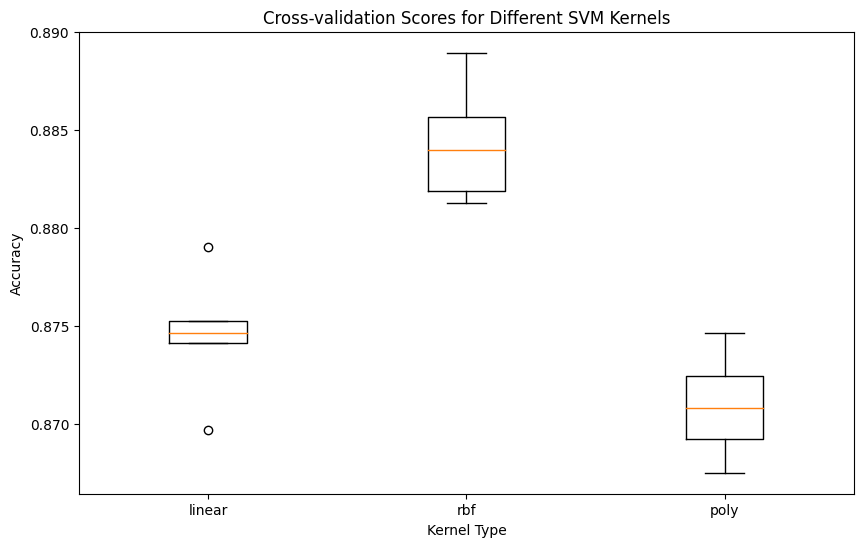

In [ ]:
# Call cross-validation analysis
X, y = load_and_preprocess_data()[0], load_and_preprocess_data()[2]
plot_cross_validation_scores(X, y)

4.K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Load and preprocess the data
def load_and_preprocess_data():
    # Read the dataset
    data = pd.read_csv('/content/drive/MyDrive/disaster_tweet.csv')

    # Drop rows with missing values
    data = data.dropna(subset=['text'])

    # Text vectorization
    vectorizer = TfidfVectorizer(max_features=1000)
    X = vectorizer.fit_transform(data['text'])
    y = data['target']

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, vectorizer


In [ ]:
# Train KNN model
def train_knn_model(X_train, X_test, y_train, y_test):
    # Initialize KNN model
    knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
    knn.fit(X_train, y_train)  # Train the model

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"KNN Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return accuracy, y_pred


In [ ]:
# Visualize results
def plot_results(accuracies):
    plt.figure(figsize=(10, 6))

    # Create bar plot
    plt.bar(['KNN'], [accuracies])
    plt.title('KNN Model Performance')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')

    # Add value labels on top of bars
    plt.text(0, accuracies, f'{accuracies:.4f}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

KNN Accuracy: 0.8593

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1878
           1       0.85      0.23      0.37       396

    accuracy                           0.86      2274
   macro avg       0.85      0.61      0.64      2274
weighted avg       0.86      0.86      0.82      2274



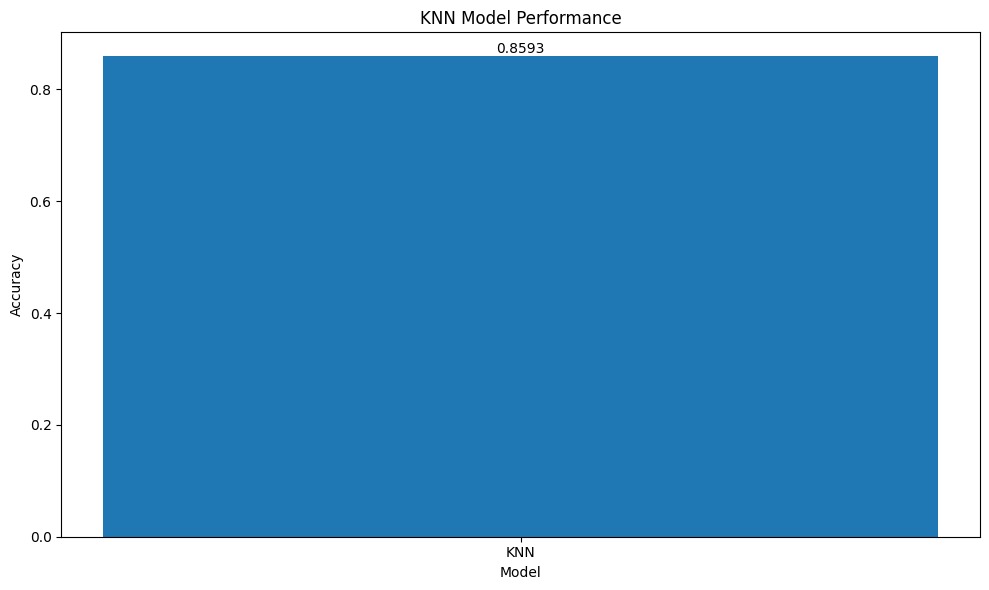

In [ ]:
# Main execution
def main():
    # Load and preprocess data
    X_train, X_test, y_train, y_test, vectorizer = load_and_preprocess_data()

    # Train KNN model and get accuracy
    accuracy, y_pred = train_knn_model(X_train, X_test, y_train, y_test)

    # Plot results
    plot_results(accuracy)

if __name__ == "__main__":
    main()

5.Naive Bayes

Data preprocessing completed successfully

Results for Multinomial NB:
Accuracy: 0.8755

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1878
           1       0.78      0.39      0.52       396

    accuracy                           0.88      2274
   macro avg       0.83      0.69      0.73      2274
weighted avg       0.87      0.88      0.86      2274


Results for Bernoulli NB:
Accuracy: 0.8791

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      1878
           1       0.84      0.38      0.52       396

    accuracy                           0.88      2274
   macro avg       0.86      0.68      0.73      2274
weighted avg       0.88      0.88      0.86      2274

Model training and evaluation completed successfully


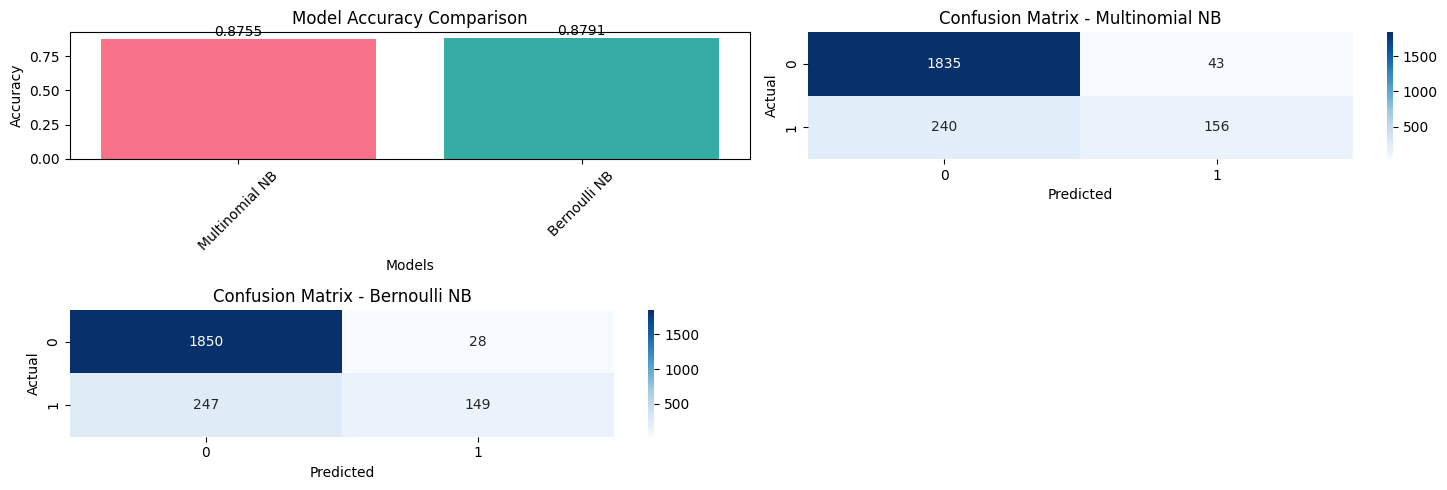

Visualization completed successfully


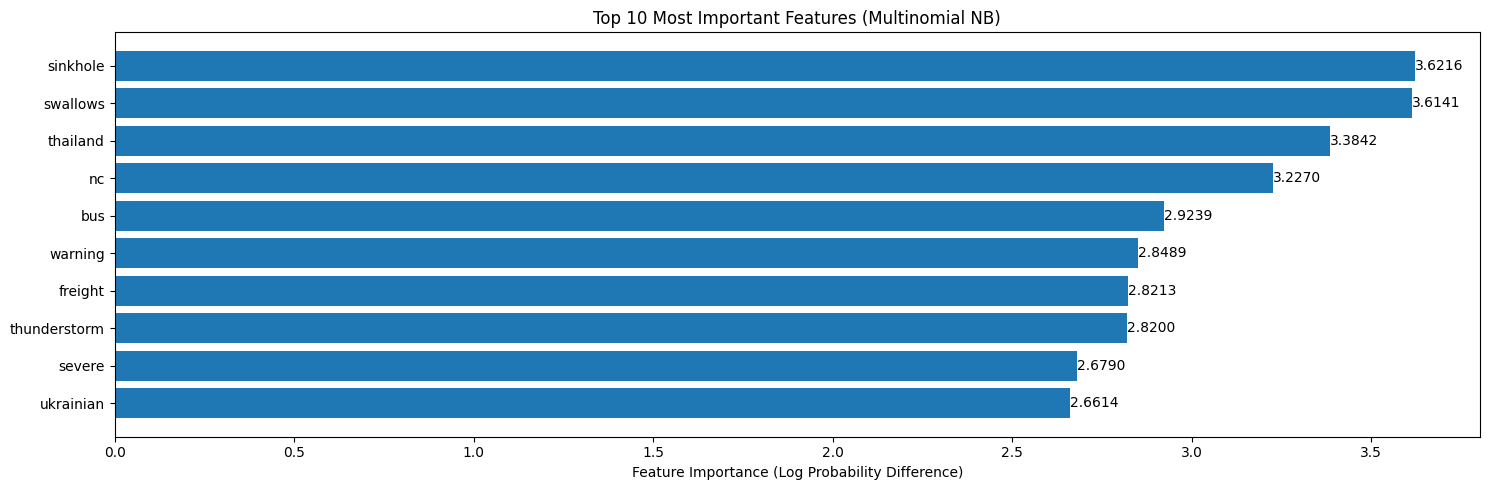

Feature importance analysis completed successfully


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

class NaiveBayesAnalysis:
    def __init__(self, data_path):
        self.data_path = data_path
        self.results = {}

    def load_and_preprocess_data(self):
        """Load and preprocess the dataset"""
        # Read the dataset
        data = pd.read_csv('/content/drive/MyDrive/disaster_tweet.csv')

        # Text vectorization using TF-IDF
        self.tfidf_vectorizer = TfidfVectorizer(max_features=1000)
        X_tfidf = self.tfidf_vectorizer.fit_transform(data['text'])

        # Text vectorization using Count Vectorizer for Bernoulli NB
        self.count_vectorizer = CountVectorizer(binary=True)
        X_count = self.count_vectorizer.fit_transform(data['text'])

        y = data['target']

        # Split the data
        self.X_tfidf_train, self.X_tfidf_test, self.X_count_train, self.X_count_test, self.y_train, self.y_test = \
            train_test_split(X_tfidf, X_count, y, test_size=0.2, random_state=42)

        return "Data preprocessing completed successfully"

    def train_and_evaluate_models(self):
        """Train and evaluate different Naive Bayes models"""
        # Initialize models
        models = {
            'Multinomial NB': MultinomialNB(),
            'Bernoulli NB': BernoulliNB(),
        }

        # Train and evaluate each model
        for name, model in models.items():
            # Use appropriate vectorized data for each model
            if name == 'Multinomial NB':
                X_train, X_test = self.X_tfidf_train, self.X_tfidf_test
            else:  # Bernoulli NB
                X_train, X_test = self.X_count_train, self.X_count_test

            # Train model
            model.fit(X_train, self.y_train)

            # Make predictions
            y_pred = model.predict(X_test)

            # Calculate metrics
            accuracy = accuracy_score(self.y_test, y_pred)
            conf_matrix = confusion_matrix(self.y_test, y_pred)
            class_report = classification_report(self.y_test, y_pred)

            # Store results
            self.results[name] = {
                'accuracy': accuracy,
                'confusion_matrix': conf_matrix,
                'classification_report': class_report,
                'predictions': y_pred
            }

            # Print results
            print(f"\nResults for {name}:")
            print(f"Accuracy: {accuracy:.4f}")
            print("\nClassification Report:")
            print(class_report)

        return "Model training and evaluation completed successfully"

    def plot_results(self):
        """Visualize the results"""
        # Create figure with subplots
        fig = plt.figure(figsize=(15, 5))

        # 1. Accuracy Comparison Bar Plot
        plt.subplot(2, 2, 1)
        accuracies = {k: v['accuracy'] for k, v in self.results.items()}
        colors = sns.color_palette("husl", len(accuracies))

        bars = plt.bar(accuracies.keys(), accuracies.values(), color=colors)
        plt.title('Model Accuracy Comparison')
        plt.xlabel('Models')
        plt.ylabel('Accuracy')
        plt.xticks(rotation=45)

        # Add value labels on top of bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.4f}',
                    ha='center', va='bottom')

        # 2. Confusion Matrices
        for i, (name, result) in enumerate(self.results.items(), 2):
            plt.subplot(2, 2, i)
            sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
            plt.title(f'Confusion Matrix - {name}')
            plt.xlabel('Predicted')
            plt.ylabel('Actual')

        plt.tight_layout()
        plt.show()

        return "Visualization completed successfully"

    def feature_importance(self, top_n=10):
        """Analyze feature importance for Multinomial NB"""
        # Get feature names
        feature_names = self.tfidf_vectorizer.get_feature_names_out()

        # Get feature importance for Multinomial NB
        multinomial_nb = MultinomialNB()
        multinomial_nb.fit(self.X_tfidf_train, self.y_train)

        # Calculate feature importance
        feature_importance = multinomial_nb.feature_log_prob_[1] - multinomial_nb.feature_log_prob_[0]

        # Get top features
        top_features_idx = np.argsort(feature_importance)[-top_n:]
        top_features = [(feature_names[i], feature_importance[i]) for i in top_features_idx]

        # Plot feature importance
        plt.figure(figsize=(15, 5))
        features, importance = zip(*top_features)

        bars = plt.barh(features, importance)
        plt.title(f'Top {top_n} Most Important Features (Multinomial NB)')
        plt.xlabel('Feature Importance (Log Probability Difference)')

        # Add value labels
        for bar in bars:
            width = bar.get_width()
            plt.text(width, bar.get_y() + bar.get_height()/2,
                    f'{width:.4f}',
                    ha='left', va='center')

        plt.tight_layout()
        plt.show()

        return "Feature importance analysis completed successfully"

def main():
    # Initialize analysis
    nb_analysis = NaiveBayesAnalysis('disaster_tweets.csv')

    # Load and preprocess data
    print(nb_analysis.load_and_preprocess_data())

    # Train and evaluate models
    print(nb_analysis.train_and_evaluate_models())

    # Plot results
    print(nb_analysis.plot_results())

    # Analyze feature importance
    print(nb_analysis.feature_importance())

if __name__ == "__main__":
    main()

# Old Dataset

Extract Disaster-Related Tweets & Identify disaster keywords:

In [ ]:
import matplotlib.pyplot as plt
# Read data
df = pd.read_csv('/content/drive/MyDrive/disaster_tweet.csv')

In [ ]:
# Define the keywords for Natural Disasters and Emergency Terms
natural_disasters = {
    "Earthquakes": [
        "earthquake", "seismic activity", "tremor", "aftershock",
        "epicenter", "faultline", "Richter scale"
    ],
    "Cyclones and Storms": [
        "cyclone", "tropical storm", "hurricane", "typhoon",
        "storm surge", "landfall", "monsoon depression",
        "IMD cyclone alert", "heavy rain", "extremely heavy rainfall",
        "rainfall", "torrential rain", "downpour", "cloudburst",
        "deluge", "monsoon rain"
    ],
    "Floods": [
        "flood", "flash flood", "river overflow", "inundation",
        "waterlogging", "submerged", "dam release",
        "flood alert", "floodwaters"
    ],
    "Landslides and Erosion": [
        "landslide", "mudslide", "rockslide",
        "debris flow", "slope failure",
        "avalanche", "riverbank erosion"
    ],
    "Droughts and Heat Events": [
        "drought", "dry spell", "water scarcity"
    ],
    "Tsunamis": [
        "tsunami", "tidal wave",
        "sea surge", "tsunami alert"
    ],
    "Extreme Weather Events": [
        "heatwave", "extreme heat"
    ],
    "Cold Weather Events": [
        "cold wave",
        "frost",
        "freezing temperature"
    ],
    "Snow and Ice Events": [
        "snowstorm",
        "hypothermia",
        "chill factor",
        "hailstorm",
        "hail",
        "ice pellets"
    ],
    "Wildfires": [
        "wildfire",
        "forest fire",
        "bushfire",
        "grassfire",
        "fire spread",
        "forest blaze"
    ]
}

emergency_terms = {
    'Health Emergencies': [
        'epidemic', 'pandemic', 'viral outbreak',
        'disease spread', 'health emergency'
    ],
    'Environmental Hazards': [
        'air pollution', 'poor air quality',
        'water contamination', 'oil spill',
        'toxic gas leak', 'chemical hazard', 'smog'
    ],
    'Structural Failures and Accidents': [
        'building collapse', 'structural failure',
        'dam failure', 'dam burst',
        'debris', 'trapped victims'
    ],
    'Industrial and Transportation Accidents': [
        'industrial accident', 'gas leak',
        'factory explosion', 'chemical spill',
        'fire outbreak', 'building on fire',
        'train derailment', 'plane crash',
        'shipwreck', 'road accident',
        'boat capsizing'
    ]
}


In [ ]:
# Function to classify keywords
def classify_keywords(keywords):
    classification = {'Natural Disasters': [], 'Emergency Terms': []}
# Combine all keywords into a single dictionary for easier lookup
    all_keywords = {**natural_disasters, **emergency_terms}

    for keyword in keywords:
        for category, words in all_keywords.items():
            if keyword.lower() in words:
                classification['Natural Disasters' if category in natural_disasters else 'Emergency Terms'].append(keyword)
                break

    return classification

In [ ]:
# Example usage
keywords_to_classify = ['earthquake', 'flood', 'air pollution', 'wildfire', 'pandemic']
classified_keywords = classify_keywords(keywords_to_classify)

In [ ]:
# Output the classified keywords
print("Classified Keywords:")
print(classified_keywords)
# Prepare data for bar graph
labels = list(classified_keywords.keys())
counts = [len(classified_keywords[label]) for label in labels]

Classified Keywords:
{'Natural Disasters': ['earthquake', 'flood', 'wildfire'], 'Emergency Terms': ['air pollution', 'pandemic']}


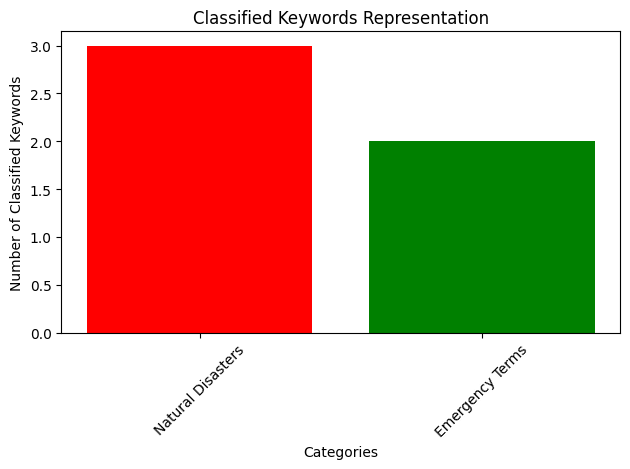

In [ ]:
# Create bar graph
plt.bar(labels, counts, color=['red', 'green'])  # Now plt is defined and accessible
plt.xlabel('Categories')
plt.ylabel('Number of Classified Keywords')
plt.title('Classified Keywords Representation')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for x-axis labels


# New Dataset

1.Extract Disaster-Related Tweets & Identify disaster keywords:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/DisasterTweets.csv')


In [ ]:
# Define disaster categories and keywords
natural_disasters = {
    'Earthquake': ['earthquake', 'seismic', 'quake'],
    'Flood': ['flood', 'flooding', 'floods'],
    'Wildfire': ['wildfire', 'wildfires', 'fire'],
    'Hurricane': ['hurricane', 'hurricanes', 'cyclone'],
    'Tornado': ['tornado', 'tornadoes'],
    'Drought': ['drought', 'droughts']
}

emergency_terms = {
    'Evacuation': ['evacuate', 'evacuation', 'evacuating'],
    'Rescue': ['rescue', 'rescuing', 'rescued'],
    'Emergency': ['emergency', 'urgent', 'crisis'],
    'Warning': ['warning', 'alert', 'caution'],
    'Damage': ['damage', 'damaged', 'destruction'],
    'Disaster': ['disaster', 'catastrophe', 'calamity']
}

In [ ]:
def count_disaster_types(text, categories):
    counts = {category: 0 for category in categories.keys()}
    if isinstance(text, str):  # Check if text is a string
        text = text.lower()
        for category, keywords in categories.items():
            if any(keyword in text for keyword in keywords):
                counts[category] += 1
    return counts

In [ ]:
# Count occurrences for natural disasters
natural_disaster_counts = {category: 0 for category in natural_disasters.keys()}
emergency_counts = {category: 0 for category in emergency_terms.keys()}

In [ ]:
# Process each tweet
# Changed df['text'] to df['Tweets'] to match the actual column name
for text in df['Tweets']:
    nd_counts = count_disaster_types(text, natural_disasters)
    em_counts = count_disaster_types(text, emergency_terms)

    for category in natural_disaster_counts:
        natural_disaster_counts[category] += nd_counts[category]
    for category in emergency_counts:
        emergency_counts[category] += em_counts[category]



<ipython-input-59-e8acf14c04dc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values_nd, y=categories_nd, ax=ax1, palette='Reds')
<ipython-input-59-e8acf14c04dc>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values_em, y=categories_em, ax=ax2, palette='Blues')


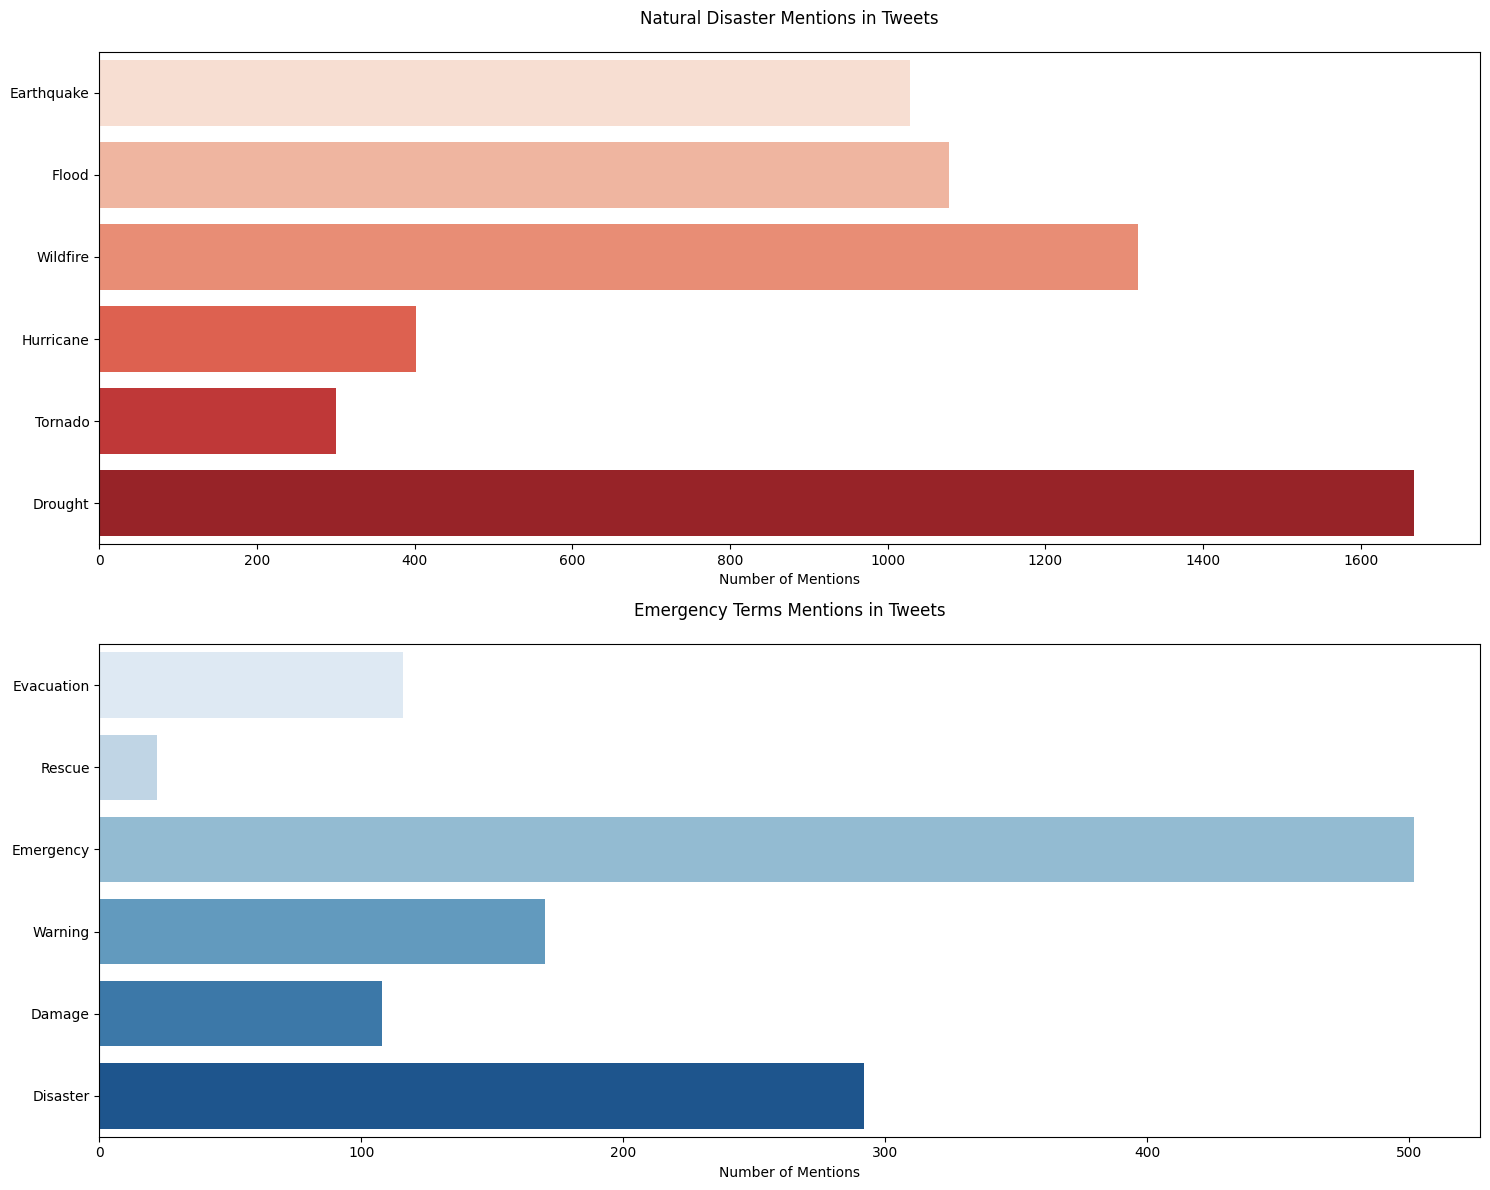

In [ ]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))
# Plot Natural Disasters
categories_nd = list(natural_disaster_counts.keys())
values_nd = list(natural_disaster_counts.values())
sns.barplot(x=values_nd, y=categories_nd, ax=ax1, palette='Reds')
ax1.set_title('Natural Disaster Mentions in Tweets', pad=20)
ax1.set_xlabel('Number of Mentions')
# Plot Emergency Terms
categories_em = list(emergency_counts.keys())
values_em = list(emergency_counts.values())
sns.barplot(x=values_em, y=categories_em, ax=ax2, palette='Blues')
ax2.set_title('Emergency Terms Mentions in Tweets', pad=20)
ax2.set_xlabel('Number of Mentions')
# Adjust layout
plt.tight_layout()
# Save the plot
plt.savefig('disaster_classification_counts.png', bbox_inches='tight', dpi=300)
plt.show()

In [ ]:
# Print the counts
print("\nNatural Disaster Counts:")
for category, count in natural_disaster_counts.items():
    print(f"{category}: {count}")



Natural Disaster Counts:
Earthquake: 1028
Flood: 1078
Wildfire: 1318
Hurricane: 402
Tornado: 300
Drought: 1668


In [ ]:
print("\nEmergency Term Counts:")
for category, count in emergency_counts.items():
    print(f"{category}: {count}")


Emergency Term Counts:
Evacuation: 116
Rescue: 22
Emergency: 502
Damage: 108
Disaster: 292


In [ ]:
print(f"\nTotal Mentions: {sum(natural_disaster_counts.values()) + sum(emergency_counts.values())}")


Total Mentions: 3658


2.Filtered_tweets

In [ ]:
!pip install regex
import regex as re

In [ ]:
# Define disaster-related keywords
disaster_keywords = {
    'Natural Disasters': [
        'flood', 'earthquake', 'hurricane', 'storm', 'tsunami',
        'wildfire', 'drought', 'landslide', 'avalanche'
    ],
    'Man-made Disasters': [
        'fire', 'explosion', 'crash', 'accident', 'collapse',
        'chemical', 'leak', 'spill'
    ]
}

In [ ]:
# Text cleaning function
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'@\w+', '', text)
        text = re.sub(r'#\w+', '', text)
        text = re.sub(r'\W', ' ', text)
        text = text.lower().strip()
    return text

In [ ]:
# Apply cleaning
# Change df['text'] to df['Tweets'] to access the correct column
df['cleaned_text'] = df['text'].apply(clean_text)

# Function to count keyword occurrences
def count_disaster_keywords(text, keywords):
    counts = {category: 0 for category in keywords.keys()}
    if isinstance(text, str):
        for category, word_list in keywords.items():
            for word in word_list:
                if word in text:
                    counts[category] += 1
    return counts

In [ ]:
# Count disasters in tweets
disaster_counts = {category: 0 for category in disaster_keywords.keys()}

for text in df['cleaned_text']:
    counts = count_disaster_keywords(text, disaster_keywords)
    for category in disaster_counts:
        disaster_counts[category] += counts[category]

In [ ]:
# Create visualization
plt.figure(figsize=(10, 5))
categories = list(disaster_counts.keys())
values = list(disaster_counts.values())


<Figure size 1000x500 with 0 Axes>

<ipython-input-86-5dfabaaab02b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=values, palette='viridis')


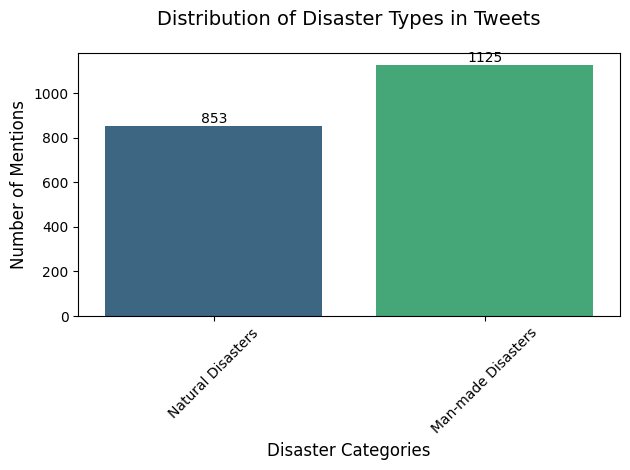

In [ ]:
# Create bar plot
sns.barplot(x=categories, y=values, palette='viridis')

# Customize the plot
plt.title('Distribution of Disaster Types in Tweets', pad=20, fontsize=14)
plt.xlabel('Disaster Categories', fontsize=12)
plt.ylabel('Number of Mentions', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on top of bars
for i, v in enumerate(values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Save the plot
plt.savefig('disaster_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Print the counts
print("\nDisaster Mention Counts:")
for category, count in disaster_counts.items():
    print(f"{category}: {count}")



Disaster Mention Counts:
Natural Disasters: 853
Man-made Disasters: 1125


In [ ]:
# Create detailed analysis DataFrame
detailed_counts = pd.DataFrame(columns=['Category', 'Keyword', 'Count'])

for category, keywords in disaster_keywords.items():
    for keyword in keywords:
        count = df['cleaned_text'].str.count(keyword).sum()
        # Use pd.concat instead of append
        detailed_counts = pd.concat([detailed_counts, pd.DataFrame([{'Category': category, 'Keyword': keyword, 'Count': count}])], ignore_index=True)
        # Sort and display detailed counts
detailed_counts = detailed_counts.sort_values('Count', ascending=False)
print("\nDetailed Keyword Analysis:")
print(detailed_counts)

# Save detailed analysis to CSV
detailed_counts.to_csv('disaster_keyword_analysis.csv', index=False)


Detailed Keyword Analysis:
              Category     Keyword Count
9   Man-made Disasters        fire   727
3    Natural Disasters       storm   444
0    Natural Disasters       flood   148
11  Man-made Disasters       crash   109
13  Man-made Disasters    collapse    95
12  Man-made Disasters    accident    94
1    Natural Disasters  earthquake    72
14  Man-made Disasters    chemical    61
2    Natural Disasters   hurricane    60
16  Man-made Disasters       spill    54
6    Natural Disasters     drought    46
8    Natural Disasters   avalanche    46
10  Man-made Disasters   explosion    42
5    Natural Disasters    wildfire    42
7    Natural Disasters   landslide    29
15  Man-made Disasters        leak    14
4    Natural Disasters     tsunami    10


3.Preparing Dataset for Integration

In [ ]:
# Load dataset
def prepare_dataset():
    # Read the dataset
    df = pd.read_csv('/content/drive/MyDrive/DisasterTweets.csv')
    # Rename columns if needed
    column_mapping = {
        'Tweets': 'text',
        'target': 'label'
    }
    df.rename(columns=column_mapping, inplace=True)

    # Remove missing values
    df.dropna(subset=['text'], inplace=True)

    # Add label if not present
    if 'label' not in df.columns:
        df['label'] = 1

In [ ]:
# Create visualization of dataset statistics
def create_dataset_visualization(df):
    plt.figure(figsize=(10, 5))

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot 1: Distribution of Labels
    label_counts = df['label'].value_counts()
    sns.barplot(x=label_counts.index, y=label_counts.values, ax=ax1, palette='coolwarm')
    ax1.set_title('Distribution of Tweet Labels', fontsize=10)
    ax1.set_xlabel('Label (1: Disaster, 0: Non-disaster)', fontsize=8)
    ax1.set_ylabel('Count', fontsize=8)

    # Add value labels
    for i, v in enumerate(label_counts.values):
        ax1.text(i, v, str(v), ha='center', va='bottom', fontsize=8)

    # Plot 2: Tweet Length Distribution
    df['text_length'] = df['text'].str.len()
    sns.histplot(data=df, x='text_length', bins=30, ax=ax2, color='skyblue')
    ax2.set_title('Distribution of Tweet Lengths', fontsize=10)
    ax2.set_xlabel('Tweet Length (characters)', fontsize=8)
    ax2.set_ylabel('Frequency', fontsize=8)

    plt.tight_layout()
    plt.savefig('dataset_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
# Print dataset statistics
def print_dataset_stats(df):
    print("\nDataset Statistics:")
    print(f"Total number of tweets: {len(df)}")
    print(f"Number of disaster tweets: {len(df[df['label'] == 1])}")
    print(f"Number of non-disaster tweets: {len(df[df['label'] == 0])}")
    print(f"Average tweet length: {df['text'].str.len().mean():.2f} characters")
    print(f"Missing values:\n{df.isnull().sum()}")

<ipython-input-158-fab64459c3a1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, ax=ax1, palette='coolwarm')


<Figure size 1000x500 with 0 Axes>

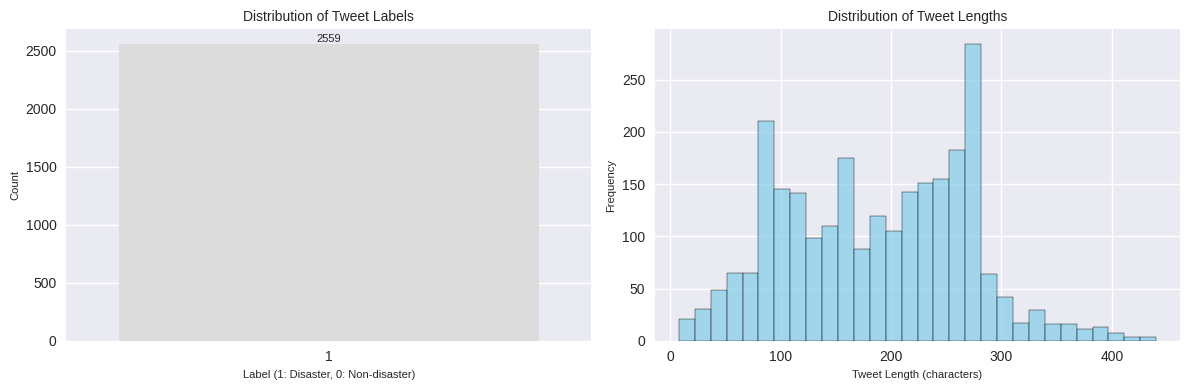


Dataset Statistics:
Total number of tweets: 2559
Number of disaster tweets: 2559
Number of non-disaster tweets: 0
Average tweet length: 186.93 characters
Missing values:
Name           1
UserName       0
Timestamp      0
Verified       0
text           0
Comments       0
Retweets       0
Likes          0
Impressions    0
Tags           0
Tweet Link     0
Tweet ID       0
Disaster       0
label          0
text_length    0
dtype: int64


In [ ]:
# Main execution
def main():
    # Prepare dataset
    df = prepare_dataset()

    # Create visualization
    create_dataset_visualization(df)

    # Print statistics
    print_dataset_stats(df)
 # Optional: Save processed dataset
    df.to_csv('processed_disaster_tweets.csv', index=False)

if __name__ == "__main__":
    main()
    # More compact visualization
def create_compact_visualization(df):
    plt.figure(figsize=(8, 3))

    # Single plot for label distribution
    label_counts = df['label'].value
    return df

4.Merge the Dataset

In [ ]:
def merge_datasets():
    try:
        # Load datasets
        existing_data = pd.read_csv('/content/drive/MyDrive/disaster_tweet.csv')
        disaster_tweets = pd.read_csv('/content/drive/MyDrive/DisasterTweets.csv')

        # Ensure consistent column names
        existing_data = existing_data.rename(columns={
            'text': 'text',
            'target': 'label'
        })

        disaster_tweets = disaster_tweets.rename(columns={
            'text': 'text',
            'target': 'label'
        })

        # Combine datasets
        combined_data = pd.concat([existing_data, disaster_tweets], ignore_index=True)

        # Remove duplicates and handle missing values
        combined_data.drop_duplicates(subset=['text'], inplace=True)
        combined_data.dropna(subset=['text', 'label'], inplace=True)

        return existing_data, disaster_tweets, combined_data

    except Exception as e:
        print(f"Error in merging datasets: {e}")
        return None, None, None


In [ ]:
def create_visualization(existing_data, disaster_tweets, combined_data):
    # Create figure with enhanced styling
    plt.style.use('seaborn')
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Plot 1: Dataset Size Comparison
    sizes = {
        'Existing Dataset': len(existing_data),
        'New Disaster Tweets': len(disaster_tweets),
        'Combined Dataset': len(combined_data)
    }

    colors = ['#2ecc71', '#e74c3c', '#3498db']
    bars = ax1.bar(sizes.keys(), sizes.values(), color=colors)

    ax1.set_title('Dataset Size Comparison', pad=20, fontsize=12)
    ax1.set_ylabel('Number of Tweets')

    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height):,}',
                ha='center', va='bottom')
    # Plot 2: Label Distribution
    label_counts = combined_data['label'].value_counts()
    sns.barplot(x=label_counts.index, y=label_counts.values,
                palette='coolwarm', ax=ax2)

    ax2.set_title('Label Distribution in Combined Dataset', pad=20, fontsize=12)
    ax2.set_xlabel('Label (0: Non-disaster, 1: Disaster)')
    ax2.set_ylabel('Count')

    # Add value labels
    for i, v in enumerate(label_counts.values):
        ax2.text(i, v, f'{int(v):,}', ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

In [ ]:
def print_statistics(existing_data, disaster_tweets, combined_data):
    print("\nDataset Statistics:")
    print(f"Existing dataset size: {len(existing_data):,}")
    print(f"New disaster tweets size: {len(disaster_tweets):,}")
    print(f"Combined dataset size: {len(combined_data):,}")
    print(f"\nLabel distribution in combined dataset:")
    print(combined_data['label'].value_counts().to_string())

<ipython-input-105-b1173cae79a5>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-105-b1173cae79a5>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values,


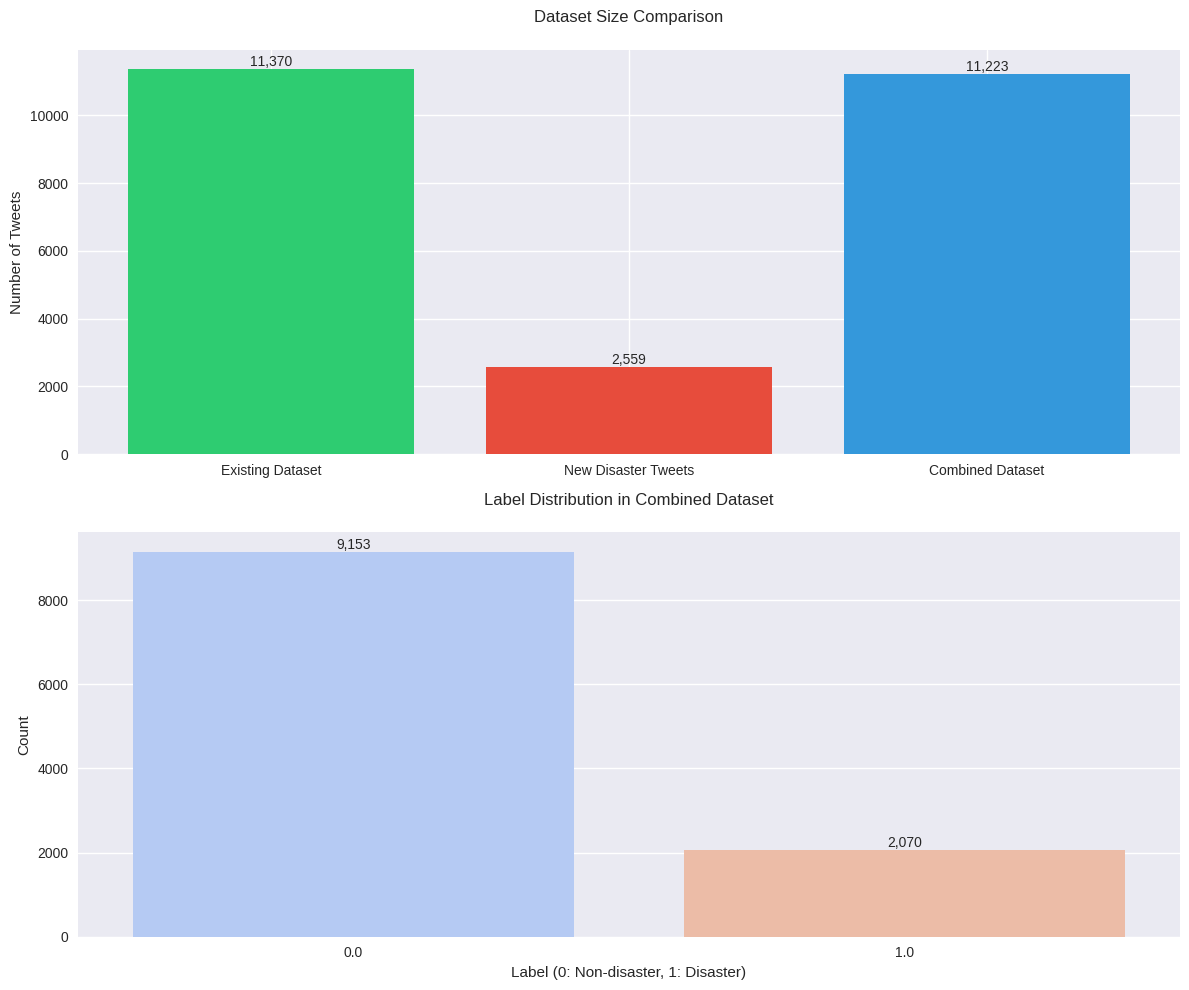


Dataset Statistics:
Existing dataset size: 11,370
New disaster tweets size: 2,559
Combined dataset size: 11,223

Label distribution in combined dataset:
label
0.0    9153
1.0    2070


In [ ]:
# Main execution
if __name__ == "__main__":
    # Merge datasets
    existing_data, disaster_tweets, combined_data = merge_datasets()

    if existing_data is not None:
        # Create visualization
        create_visualization(existing_data, disaster_tweets, combined_data)
        # Print statistics
        print_statistics(existing_data, disaster_tweets, combined_data)
    else:
        print("No valid data available for processing")

5.Validate and Explore


Dataset Information:
Total number of tweets: 2559

Disaster Type Distribution:
Disaster
Drought       770
Wildfire      540
Earthquake    500
Floods        436
Hurricanes    178
Tornadoes     135
Name: count, dtype: int64


<ipython-input-127-66e21336d139>:23: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
<ipython-input-127-66e21336d139>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disaster_counts.index,
<ipython-input-127-66e21336d139>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Disaster',


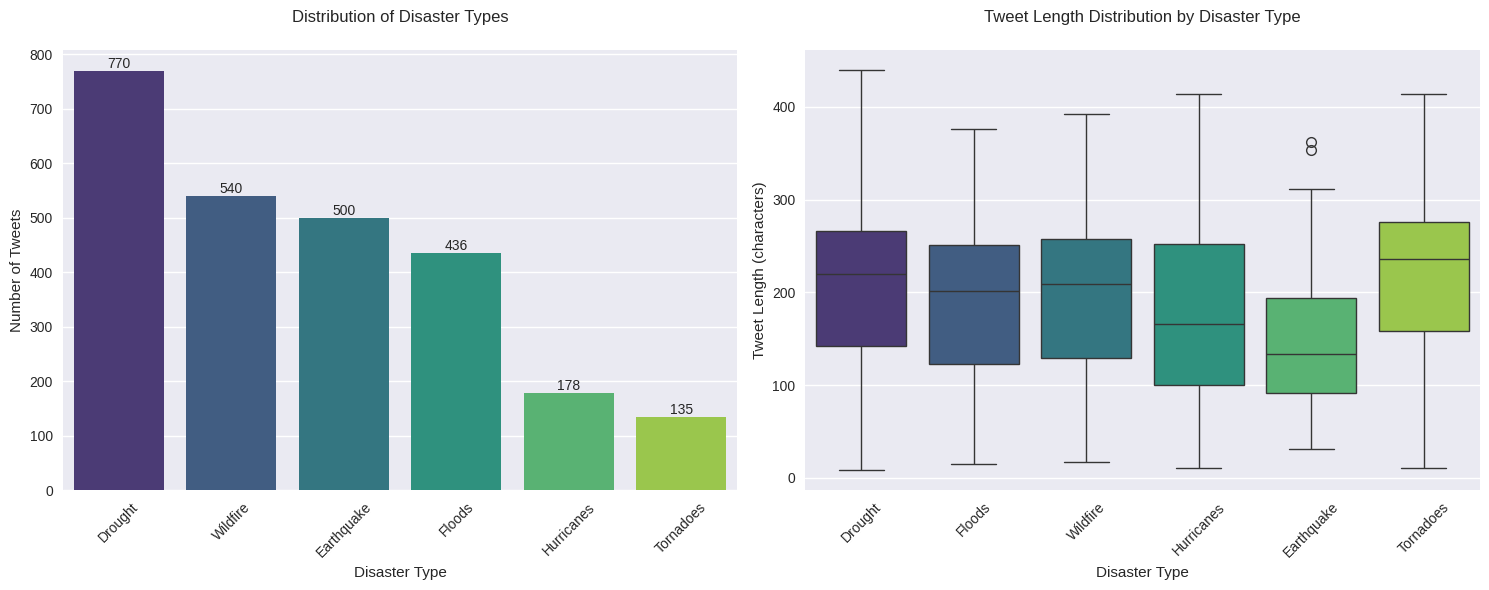


Tweet Length Statistics by Disaster Type:
            count        mean        std   min     25%    50%     75%    max
Disaster                                                                    
Drought     770.0  201.979221  84.656943   8.0  142.25  219.5  266.00  440.0
Earthquake  500.0  148.702000  67.640962  31.0   91.00  133.0  194.25  362.0
Floods      436.0  189.133028  77.141701  15.0  123.00  201.0  251.00  376.0
Hurricanes  178.0  172.370787  94.013989  11.0  100.25  165.5  252.25  414.0
Tornadoes   135.0  221.088889  91.679802  10.0  158.00  236.0  275.50  414.0
Wildfire    540.0  195.329630  79.852570  17.0  128.75  208.5  257.00  392.0


In [ ]:
def analyze_disaster_tweets():
    # Load the dataset
    try:
        df = pd.read_csv('/content/drive/MyDrive/DisasterTweets.csv')

        # Basic data exploration
        print("\nDataset Information:")
        print(f"Total number of tweets: {len(df)}")

        # Count disaster types
        disaster_counts = df['Disaster'].value_counts()
        print("\nDisaster Type Distribution:")
        print(disaster_counts)

        # Create visualizations
        create_disaster_visualizations(df)

    except Exception as e:
        print(f"Error loading dataset: {e}")

def create_disaster_visualizations(df):
    # Set style
    plt.style.use('seaborn')

    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # 1. Bar plot of disaster types
    disaster_counts = df['Disaster'].value_counts()
    sns.barplot(x=disaster_counts.index,
                y=disaster_counts.values,
                palette='viridis',
                ax=ax1)

    ax1.set_title('Distribution of Disaster Types', pad=20)
    ax1.set_ylabel('Number of Tweets')
    ax1.set_xlabel('Disaster Type')
    # Rotate x-axis labels for better readability
    ax1.tick_params(axis='x', rotation=45)

    # Add value labels on bars
    for i, v in enumerate(disaster_counts.values):
        ax1.text(i, v, f'{v:,}', ha='center', va='bottom')

    # 2. Tweet length distribution by disaster type
    df['tweet_length'] = df['Tweets'].str.len()
    sns.boxplot(x='Disaster',
                y='tweet_length',
                data=df,
                palette='viridis',
                ax=ax2)

    ax2.set_title('Tweet Length Distribution by Disaster Type', pad=20)
    ax2.set_xlabel('Disaster Type')
    ax2.set_ylabel('Tweet Length (characters)')
    ax2.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Print additional statistics
    print("\nTweet Length Statistics by Disaster Type:")
    print(df.groupby('Disaster')['tweet_length'].describe())

if __name__ == "__main__":
    analyze_disaster_tweets()

#Quality Assurance and Data Validation tasks

GROUP WORK FOR OLD DATASET

1.Review Data Consistency and Format

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/disaster_tweet.csv')

In [ ]:
# Step 1: Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
id             0
keyword        0
location    3418
text           0
target         0
dtype: int64


In [ ]:
# Step 2: Check data types
print("\nData types of columns:")
print(df.dtypes)


Data types of columns:
id           int64
keyword     object
location    object
text        object
target       int64
dtype: object


In [ ]:
# Step 3: Standardize text data (convert to lowercase)
if 'text' in df.columns:
    df['text'] = df['text'].str.lower()
else:
    print("Column 'text' not found in the dataset")

In [ ]:
# Step 4: Check for valid values in the target column
if 'target' in df.columns:
    valid_target = df['target'].unique()
    print("\nUnique values in target column:", valid_target)
else:
    print("Column 'target' not found in the dataset")



Unique values in target column: [1 0]


In [ ]:
# Step 5: Check for unnecessary characters or spaces in text
if 'text' in df.columns:
    df['text'] = df['text'].str.strip()

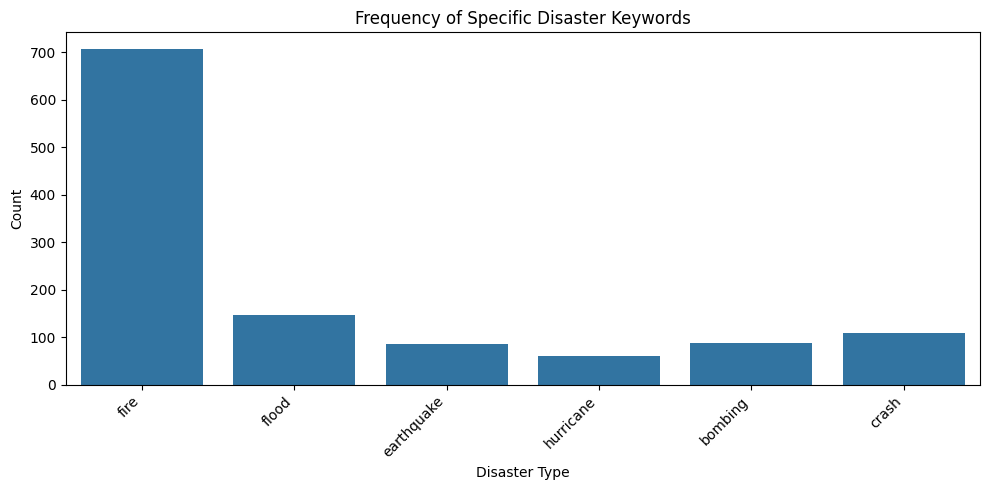


Disaster Keyword Counts:
fire: 707
flood: 146
earthquake: 86
hurricane: 61
bombing: 87
crash: 109


In [ ]:
# Additional analysis for specific disaster keywords
disaster_keywords = ['fire', 'flood', 'earthquake', 'hurricane', 'bombing', 'crash']
keyword_counts = {}

for keyword in disaster_keywords:
    keyword_counts[keyword] = df[df['text'].str.contains(keyword, case=False, na=False)].shape[0]

# Create bar plot for disaster keywords
plt.figure(figsize=(10, 5))
sns.barplot(x=list(keyword_counts.keys()), y=list(keyword_counts.values()))
plt.title('Frequency of Specific Disaster Keywords')
plt.xlabel('Disaster Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nDisaster Keyword Counts:")
for keyword, count in keyword_counts.items():
    print(f"{keyword}: {count}")

In [ ]:
# Step 7: Print some basic statistics
print("\nBasic statistics of the dataset:")
print(df.describe())


Basic statistics of the dataset:
                 id        target
count  11370.000000  11370.000000
mean    5684.500000      0.185928
std     3282.380615      0.389066
min        0.000000      0.000000
25%     2842.250000      0.000000
50%     5684.500000      0.000000
75%     8526.750000      0.000000
max    11369.000000      1.000000


In [ ]:
# Step 8: Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
id             0
keyword        0
location    3418
text           0
target         0
dtype: int64



Number of duplicate IDs: 0


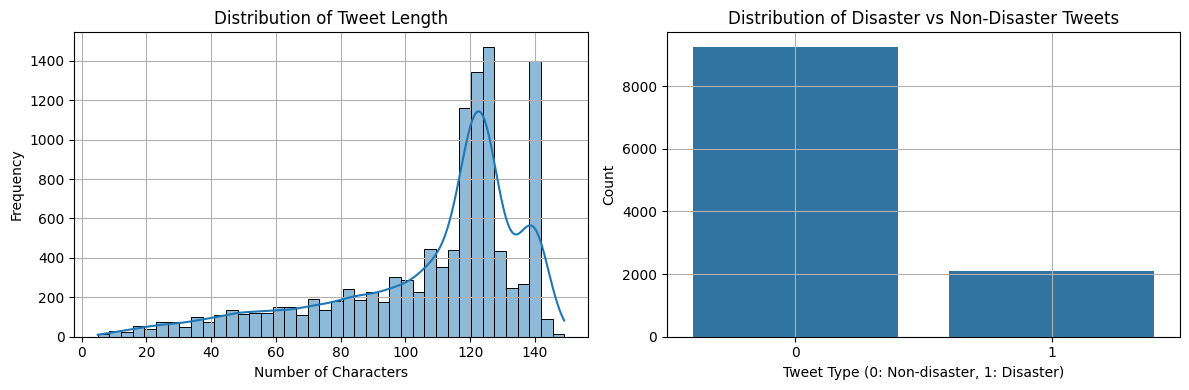

In [ ]:
# Additional step: Check for duplicate IDs
if 'id' in df.columns:
    duplicate_ids = df['id'].duplicated().sum()
    print(f"\nNumber of duplicate IDs: {duplicate_ids}")
else:
    print("Column 'id' not found in the dataset")

# Additional step: Analyze the distribution of text length and target
plt.figure(figsize=(12, 4))

# Distribution of text length
plt.subplot(1, 2, 1)
df['text_length'] = df['text'].str.len()
sns.histplot(data=df['text_length'], bins=40, kde=True)
plt.title('Distribution of Tweet Length')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.grid(True)

# Distribution of target (disaster vs non-disaster)
plt.subplot(1, 2, 2)
sns.countplot(x='target', data=df)
plt.title('Distribution of Disaster vs Non-Disaster Tweets')
plt.xlabel('Tweet Type (0: Non-disaster, 1: Disaster)')
plt.ylabel('Count')
plt.grid(True)

plt.tight_layout()
plt.show()



In [ ]:
# Print some statistics
print("\nText Length Statistics:")
print(df['text_length'].describe())

print("\nTarget Distribution:")
print(df['target'].value_counts(normalize=True))


Text Length Statistics:
count    11370.000000
mean       107.572032
std         30.135370
min          5.000000
25%         94.000000
50%        119.000000
75%        126.000000
max        149.000000
Name: text_length, dtype: float64

Target Distribution:
target
0    0.814072
1    0.185928
Name: proportion, dtype: float64


2.Identify and Remove Duplicates


In [ ]:
# Step 1: Identify and count duplicates
duplicate_count = df.duplicated(subset='text').sum()

In [ ]:
# Step 2: Remove duplicates while keeping the first occurrence
df_cleaned = df.drop_duplicates(subset='text', keep='first')

In [ ]:
# Step 3: Count the number of tweets after removing duplicates
cleaned_count = df_cleaned.shape[0]

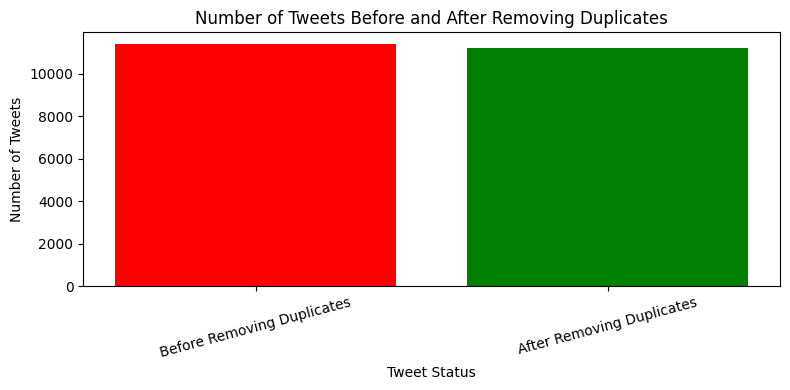

In [ ]:
# Step 4: Create a bar graph to represent the number of tweets before and after removing duplicates
plt.figure(figsize=(8, 4))
plt.bar(['Before Removing Duplicates', 'After Removing Duplicates'], [df.shape[0], cleaned_count], color=['red', 'green'])
plt.title('Number of Tweets Before and After Removing Duplicates')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweet Status')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [ ]:
# Display the number of duplicates found
print(f"Number of duplicate tweets found: {duplicate_count}")
print(f"Number of tweets after removing duplicates: {cleaned_count}")

Number of duplicate tweets found: 149
Number of tweets after removing duplicates: 11221


3.Filter Out Irrelevant Tweets

In [ ]:
# Step 1: Define relevant disaster types
relevant_disasters = ['Drought', 'Earthquake', 'Floods', 'Hurricanes', 'Tornadoes', 'Wildfire']

In [ ]:
# Step 2: Filter the Data
# Create a mask for relevant tweets based on the 'Disaster' column
mask = df['keyword'].isin(relevant_disasters)

In [ ]:
# Create a DataFrame for relevant and irrelevant tweets
df_relevant = df[mask]
df_irrelevant = df[~mask]

In [ ]:
# Step 3: Count the number of relevant and irrelevant tweets
relevant_count = df_relevant.shape[0]
irrelevant_count = df_irrelevant.shape[0]

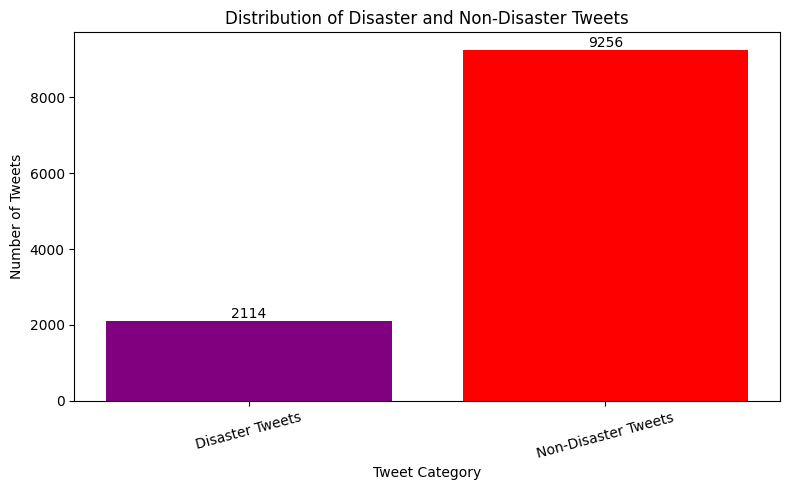


Number of Disaster Tweets: 2114
Number of Non-Disaster Tweets: 9256


In [ ]:
# Step 4: Create a bar graph to represent disaster vs non-disaster tweets
if 'target' in df.columns:
    # Count the number of disaster and non-disaster tweets
    disaster_count = (df['target'] == 1).sum()
    non_disaster_count = (df['target'] == 0).sum()

    # Create the bar plot
    plt.figure(figsize=(8, 5))
    plt.bar(['Disaster Tweets', 'Non-Disaster Tweets'],
            [disaster_count, non_disaster_count],
            color=['purple', 'red'])

    plt.title('Distribution of Disaster and Non-Disaster Tweets')
    plt.ylabel('Number of Tweets')
    plt.xlabel('Tweet Category')
    plt.xticks(rotation=15)

    # Add value labels on top of each bar
    for i, v in enumerate([disaster_count, non_disaster_count]):
        plt.text(i, v, str(v), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

    # Print the counts
    print(f"\nNumber of Disaster Tweets: {disaster_count}")
    print(f"Number of Non-Disaster Tweets: {non_disaster_count}")
else:
    print("Target column not found in the dataset")

In [ ]:
# Display the counts
print(f"Number of relevant tweets: {relevant_count}")
print(f"Number of irrelevant tweets: {irrelevant_count}")

# Display the distribution of disaster types
print("\nDistribution of disaster types:")
print(df['keyword'].value_counts()) # Changed 'Disaster' to 'keyword'

Number of relevant tweets: 0
Number of irrelevant tweets: 11370

Distribution of disaster types:
keyword
thunderstorm     93
flattened        88
mass%20murder    86
stretcher        86
drown            83
                 ..
electrocuted     16
rainstorm        11
siren            10
deluged          10
tsunami           6
Name: count, Length: 219, dtype: int64


4.Validate Data Quality for Analysis

In [ ]:
# Step 1: Ensure Completeness
# Changed 'Tweets' to 'text' (assuming 'text' is the correct column name)
missing_tweets = df['text'].isnull().sum()
missing_disasters = df['keyword'].isnull().sum() # Changed 'Disaster' to 'keyword' assuming it's the correct disaster type column

In [ ]:
# Step 2: Check for Label Accuracy (assuming all tweets should have a disaster label)
inconsistent_labels = df[df['text'].notnull() & df['keyword'].isnull()].shape[0]

In [ ]:
# Step 3: Count tweets with content but no label
content_no_label = df[df['text'].notnull() & df['keyword'].isnull()].shape[0]

In [ ]:
# Step 4: Prepare data for visualization
categories = ['Missing Tweets', 'Missing Disaster Labels', 'Inconsistent Labels', 'Content without Label']
counts = [missing_tweets, missing_disasters, inconsistent_labels, content_no_label]

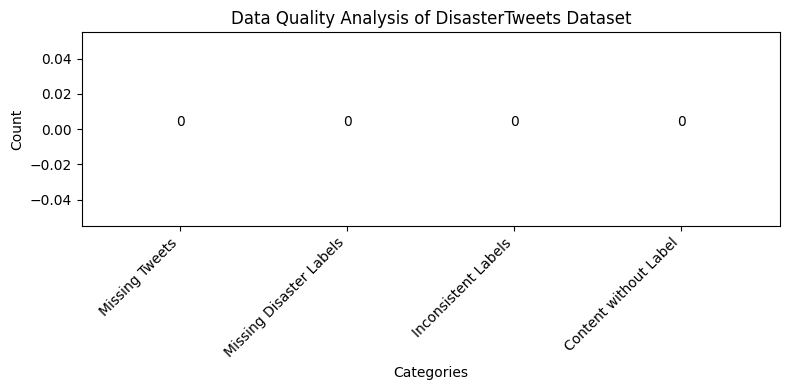

In [ ]:
# Step 5: Create bar graph
plt.figure(figsize=(8, 4))
bars = plt.bar(categories, counts, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Data Quality Analysis of DisasterTweets Dataset')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [ ]:
# Print summary
print(f"Total tweets: {len(df)}")
print(f"Missing tweets: {missing_tweets}")
print(f"Missing disaster labels: {missing_disasters}")
print(f"Tweets with content but no label: {content_no_label}")
print(f"Inconsistent labels: {inconsistent_labels}")

Total tweets: 11370
Missing tweets: 0
Missing disaster labels: 0
Tweets with content but no label: 0
Inconsistent labels: 0
